# **Chapter 11**
## *Additional Statistical Modeling Techniques for Time Series*, 

This chapter picks up picks up from Chapter 10, "Building Univariate Time Series Models Using Statistical Methods", diving into more advanced and practical models, such as vector autoregressive (VAR) for multivariate time series, generalized autoregressive conditional heteroskedasticity (GARCH) for forecasting volatility, and an introduction to the `Prophet` algorithm and library.


In this chapter, we will cover the following recipes:
* Forecasting time series data using auto_arima
* Forecasting time series data using Facebook Prophet
* Forecasting multivariate time series data using VAR
* Evaluating vector autoregressive (VAR) models
* Forecasting volatility in financial time series data with GARCH

# Technical Requirements


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
import warnings

warnings.filterwarnings('ignore')
plt.rc("figure", figsize=(16, 5))

**Check installed versions**

In [2]:
import matplotlib
import statsmodels as sm
import prophet
import arch
import pmdarima

print(f'''
Matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}   
numpy -> {np.__version__}
statsmodels -> {sm.__version__}
prophet -> {prophet.__version__}
arch -> {arch.__version__}
pmdarima -> {pmdarima.__version__}
''')


Matplotlib -> 3.9.2
pandas -> 2.2.2   
numpy -> 1.26.4
statsmodels -> 0.14.2
prophet -> 1.1.6
arch -> 7.2.0
pmdarima -> 2.0.4



In [3]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

# Recipe 1. Forecasting Time Series Data using Auto_ARIMA

You will use the milk_production.csv data used in Chapter 10, *Building Univariate Time Series Models Using Statistical Methods*. Recall that the data contains both trend and seasonality, so you will be training a SARIMA model.

In [4]:
milk_file = ('https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/refs/heads/main/datasets/Ch11/milk_production.csv')

milk = pd.read_csv(milk_file, 
                   index_col='month', 
                   parse_dates=True)

milk.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(milk, test_size=0.10, shuffle=False)
# same results using pmdarima
# train, test = pm.model_selection.train_test_split(milk, test_size=0.10)

print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (151, 1)
Test: (17, 1)


## PMARIMA

In [6]:
import pmdarima as pm

auto_model = pm.auto_arima(train,                 # Fit an automatic ARIMA model to the training data
                           seasonal=True,         # Enable seasonal ARIMA modeling
                           m=12,                  # Set the seasonal period (12 for monthly data with yearly seasonality)
                           test='adf',            # Use the Augmented Dickey-Fuller test to determine the order of differencing (d)
                           stepwise=True)         # Use a stepwise algorithm to efficiently search for the best model

auto_model.summary()                              # Display a statistical summary of the selected ARIMA model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -475.008
Date:                            Fri, 21 Mar 2025   AIC                            956.016
Time:                                    15:20:48   BIC                            964.798
Sample:                                01-01-1962   HQIC                           959.585
                                     - 07-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2714      0.082     -3.326      0.001      -0.431      -0.111
ma.S.L12      -0.6233      0.079     -7.908      0.000      -0.778      -0.469
sigma2        54.7638      5.498      9.960      0.000      43.987      65.540
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.78
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.74
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
auto_model = pm.auto_arima(train,                 # Fit an automatic ARIMA model to the training data
                           seasonal=True,         # Enable seasonal ARIMA modeling
                           m=12,                  # Set seasonal period (12 months for yearly seasonality)
                           test='adf',            # Use Augmented Dickey-Fuller test to determine order of differencing (d)
                           stepwise=True,         # Use stepwise search to reduce computation time
                           trace=True)            # Print progress of model selection to the console

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=961.878, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1005.341, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=971.814, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=956.016, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=996.508, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=957.982, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=957.967, Time=0.25 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=971.938, Time=0.04 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=960.016, Time=0.33 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=964.474, Time=0.04 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=957.884, Time=0.11 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=957.783, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=956.436, Time=0.10 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=959.701, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12] interce

In [8]:
auto_model = pm.auto_arima(train,                       # Fit an automatic seasonal ARIMA model to the training data
                           seasonal=True,               # Enable seasonal modeling
                           m=12,                        # Set seasonal period (e.g., 12 for monthly data with yearly seasonality)
                           test='adf',                  # Use Augmented Dickey-Fuller test to determine the optimal 'd' (non-seasonal differencing)
                           information_criterion='bic', # Use BIC (Bayesian Information Criterion) to select the best model
                           stepwise=True,               # Use a stepwise search algorithm to speed up the model selection
                           trace=True)                  # Output the progress and models evaluated during search

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=982.369, Time=0.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=1008.269, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=980.596, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=964.798, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=1002.362, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=969.691, Time=0.12 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=969.676, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=980.720, Time=0.04 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=974.652, Time=0.31 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=970.329, Time=0.06 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=969.593, Time=0.11 sec
 ARIMA(0,1,2)(0,1,1)[12]             : BIC=969.493, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=965.218, Time=0.08 sec
 ARIMA(1,1,2)(0,1,1)[12]             : BIC=974.337, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12] interc

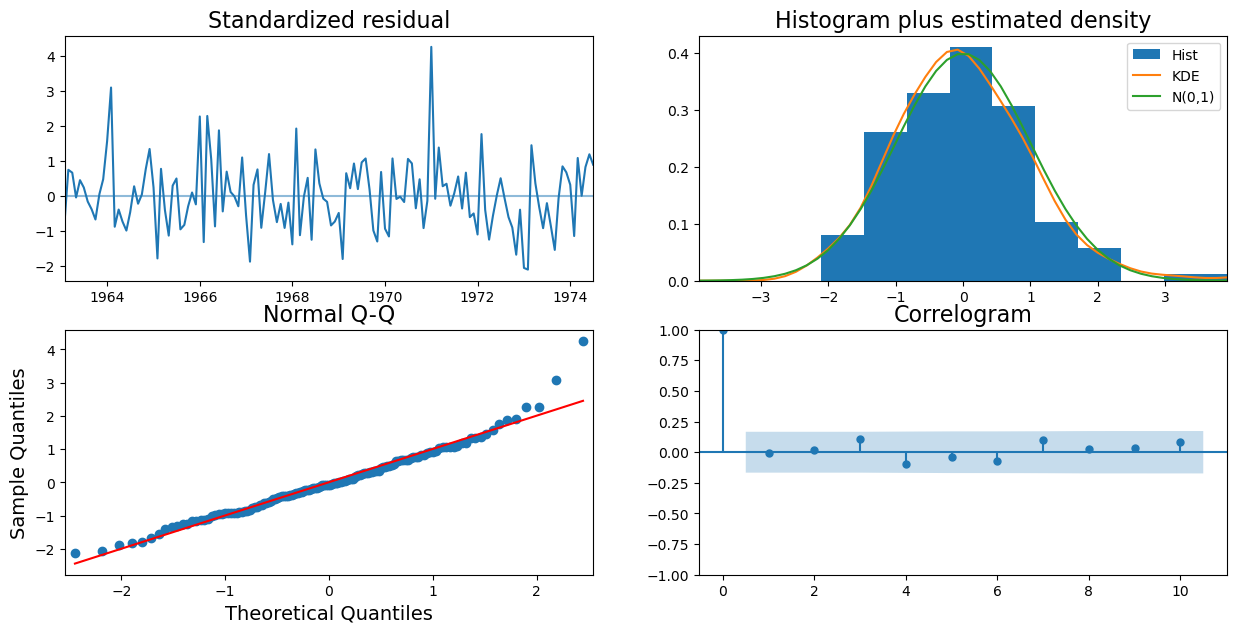

In [9]:
auto_model.plot_diagnostics(figsize=(15,7))  # Plot diagnostics for the selected ARIMA model: residuals, histogram, Q-Q plot, and correlogram

plt.show()                                   # Display the diagnostic plots

In [10]:
auto_model.scoring

'mse'

In [11]:
auto_model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

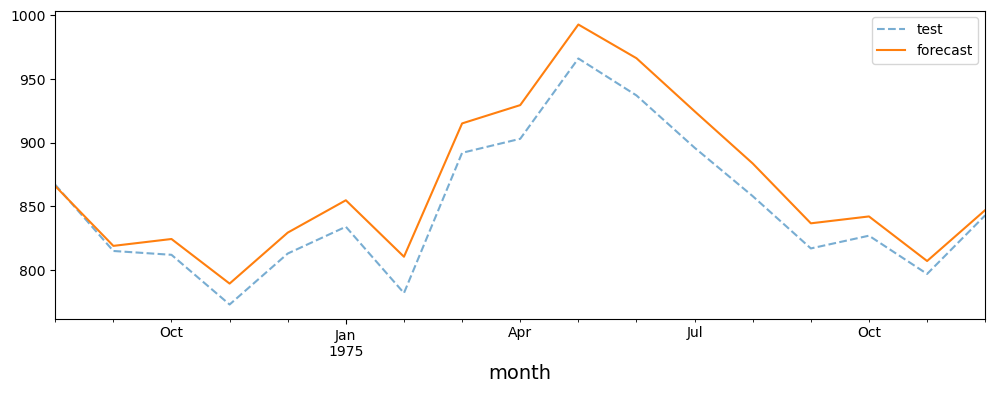

In [12]:
n = test.shape[0]                                     # Get the number of periods to forecast based on the test set size
index = test.index                                    # Store the datetime index of the test set for alignment

ax = test.plot(style='--', alpha=0.6, figsize=(12,4)) # Plot the actual test data with dashed line and some transparency

pd.Series(auto_model.predict(n_periods=n),            # Generate forecasts for n future periods using the auto ARIMA model
          index=index).plot(style='-', ax=ax)         # Plot the forecasted values with a solid line on the same axes

plt.legend(['test', 'forecast'])                      # Add a legend to distinguish between actual and predicted values
plt.show()                                            # Display the plot

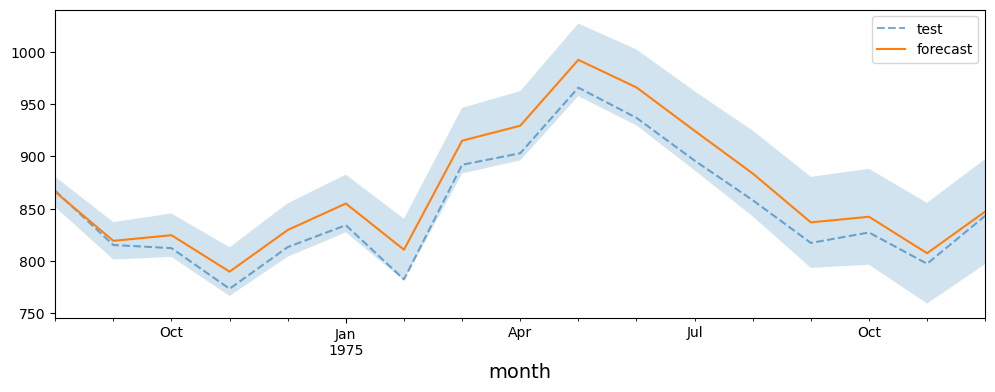

In [13]:
n = test.shape[0]                                                   # Get the number of periods to forecast based on the test set length

forecast, conf_interval = auto_model.predict(n_periods=n,           # Generate forecast for the next n periods using the trained auto ARIMA model
                                             return_conf_int=True)  # Return the confidence interval for each forecasted point

lower_ci, upper_ci = zip(*conf_interval)                            # Unpack the lower and upper bounds of the confidence interval

index = test.index                                                  # Store the datetime index of the test set for plotting

ax = test.plot(style='--', alpha=0.6, figsize=(12,4))               # Plot the actual test data with dashed lines and some transparency

pd.Series(forecast, index=index).plot(style='-', ax=ax)             # Plot the forecasted values with a solid line

plt.fill_between(index, lower_ci, upper_ci, alpha=0.2)              # Add shaded confidence interval between lower and upper bounds

plt.legend(['test', 'forecast'])                                    # Add a legend to label the test and forecast series
plt.show()                                                          # Display the plot

In [14]:
# Checks whether the sum of the forecasted values is equal to the sum of the mean of the confidence intervals
sum(forecast) == sum(conf_interval.mean(axis=1))

True

In [15]:
train.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


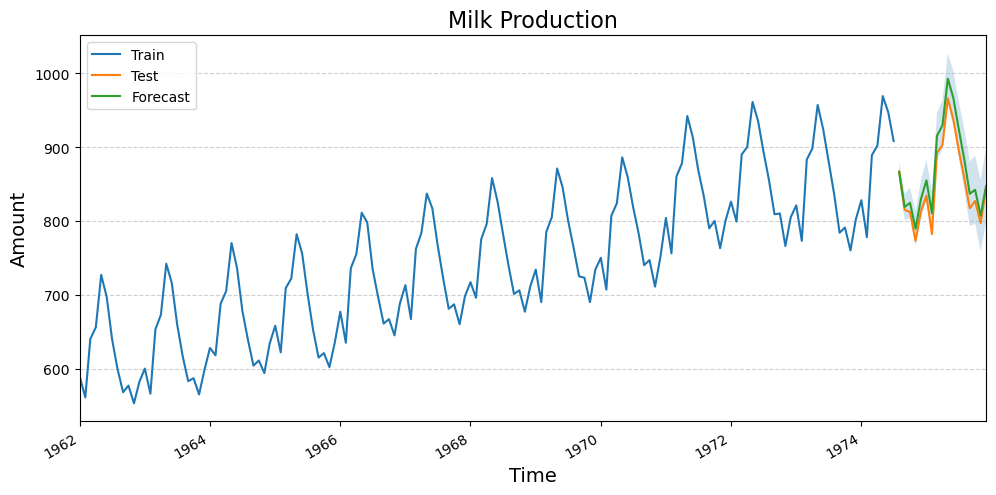

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(train, label='Train')
ax.plot(test, label='Test')
ax.plot(forecast, label='Forecast')
ax.fill_between(index, lower_ci, upper_ci, alpha=0.2)

ax.set_xlabel('Time')
ax.set_ylabel('Amount')
ax.set_title('Milk Production')
ax.set_xlim(pd.to_datetime('1962-01-01'), pd.to_datetime('1975-12-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6) 
ax.legend()

fig.autofmt_xdate()
plt.tight_layout()

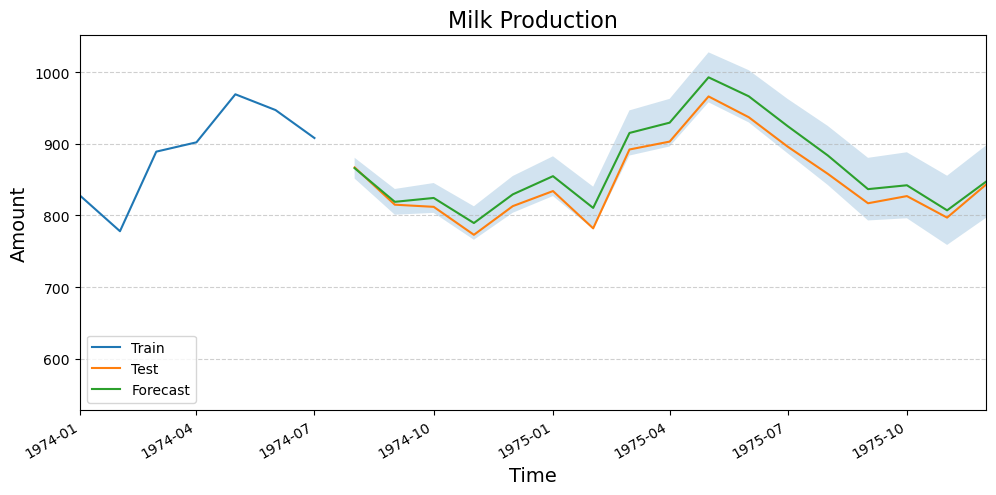

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(train, label='Train')
ax.plot(test, label='Test')
ax.plot(forecast, label='Forecast')
ax.fill_between(index, lower_ci, upper_ci, alpha=0.2)

ax.set_xlabel('Time')
ax.set_ylabel('Amount')
ax.set_title('Milk Production')
ax.set_xlim(pd.to_datetime('1974-01-01'), pd.to_datetime('1975-12-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6) 
ax.legend(loc=3)

fig.autofmt_xdate()
plt.tight_layout()

## There is more

In [18]:
from pmdarima.arima.utils import ndiffs, nsdiffs

# ADF test:
n_adf = ndiffs(milk, test='adf') 

# KPSS test (auto_arima default):
n_kpss = ndiffs(milk, test='kpss') 

# PP test:
n_pp = ndiffs(milk, test='pp')  

In [19]:
print(f'''
differencing (d) term using:
    ADF: {n_adf}
    KPSS: {n_kpss}
    PP: {n_pp}
''')


differencing (d) term using:
    ADF: 0
    KPSS: 1
    PP: 0



In [20]:
max_D = nsdiffs(milk,           # Determines the number of seasonal differences needed to make the series stationary
                test='ocsb',    # Uses the OCSB (Osborn-Chui-Smith-Birchenhall) test for seasonal unit roots
                m=12,           # Specifies the seasonal period (12 for monthly data)
                max_D=12)       # Maximum number of seasonal differences to consider

# The result, max_D, is the recommended number of seasonal differences (D) to apply
print(f'Seasonal differencing (D) term: {max_D}')

Seasonal differencing (D) term: 1


In [21]:
model = pm.auto_arima(train,                      # Fit an automatic seasonal ARIMA model on the training data
                      seasonal=True,              # Enable seasonal modeling (SARIMA)
                      with_intercept=True,        # Include an intercept term in the model
                      d=1,                        # Set non-seasonal differencing order to 1
                      max_d=2,                    # Allow up to 2 non-seasonal differences if needed
                      start_p=0, max_p=2,         # Search for AR terms (p) from 0 to 2
                      start_q=0, max_q=2,         # Search for MA terms (q) from 0 to 2
                      m=12,                       # Set seasonal period to 12 (monthly data with yearly seasonality)
                      D=1,                        # Set seasonal differencing order to 1
                      max_D=2,                    # Allow up to 2 seasonal differences if needed
                      start_P=0, max_P=2,         # Search for seasonal AR terms (P) from 0 to 2
                      start_Q=0, max_Q=2,         # Search for seasonal MA terms (Q) from 0 to 2
                      information_criterion='aic',# Use AIC to evaluate and select the best model
                      stepwise=False,             # Use full grid search (more exhaustive, slower, but potentially more accurate)
                      out_of_sample_siz=25,       # Use 25 data points as out-of-sample validation during model evaluation
                      test='kpss',                # Use KPSS test to determine if differencing is needed (stationarity test)
                      score='mape',               # Use Mean Absolute Percentage Error (MAPE) to evaluate forecast accuracy
                      trace=True)                 # Print progress and model combinations being evaluated

 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=1007.319, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=966.470, Time=0.10 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=968.422, Time=0.17 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=983.036, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=968.438, Time=0.11 sec
 ARIMA(0,1,0)(1,1,2)[12] intercept   : AIC=970.470, Time=0.25 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=973.451, Time=0.23 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=968.640, Time=0.28 sec
 ARIMA(0,1,0)(2,1,2)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=998.468, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=958.000, Time=0.11 sec
 ARIMA(0,1,1)(0,1,2)[12] intercept   : AIC=959.947, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=973.934, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12] intercept   : AIC=959.963, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12] intercept   : AIC=962.000, Time=0.32 sec
 ARIMA(0,1,1)

In [22]:
# Returns the number of data points used for out-of-sample validation during model selection
model.out_of_sample_size  

0

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -472.969
Date:                            Fri, 21 Mar 2025   AIC                            957.937
Time:                                    15:21:16   BIC                            975.501
Sample:                                01-01-1962   HQIC                           965.075
                                     - 07-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0460      0.621     -0.074      0.941      -1.263       1.171
ar.L1         -1.1997      0.092    -13.044      0.000      -1.380      -1.019
ar.L2         -0.3072      0.098     -3.137      0.002      -0.499      -0.115
ma.L1          0.9585      0.066     14.616      0.000       0.830       1.087
ma.S.L12      -0.6124      0.084     -7.289      0.000      -0.777      -0.448
sigma2        52.8039      5.479      9.637      0.000      42.065      63.543
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                41.88
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.82
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

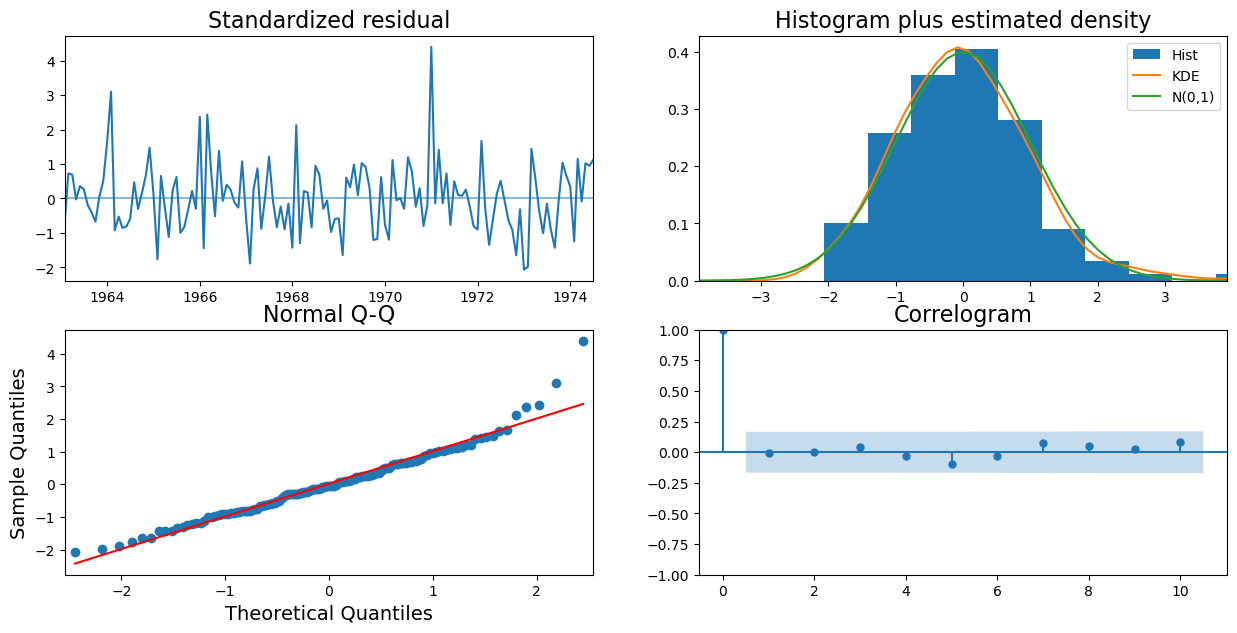

In [24]:
model.plot_diagnostics(figsize=(15,7))
plt.show()

# Recipe 2. Forecasting Time Series Data using Prophet

In [25]:
milk_file = ('https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/refs/heads/main/datasets/Ch11/milk_production.csv')
milk2 = pd.read_csv(milk_file, parse_dates=['month'] )
milk2.head()

,month,production
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [26]:
milk2.columns = ['ds', 'y']
milk2.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [27]:
idx = round(len(milk2) * 0.90)    # Calculate the index to split the data at 90% of its length

train = milk2[:idx]               # Assign the first 90% of the data to the training set
test = milk2[idx:]                # Assign the remaining 10% to the test set

print(f'Train: {train.shape}')   # Print the shape of the training set
print(f'Test: {test.shape}')     # Print the shape of the test set

Train: (151, 2)
Test: (17, 2)


In [28]:
milk2.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


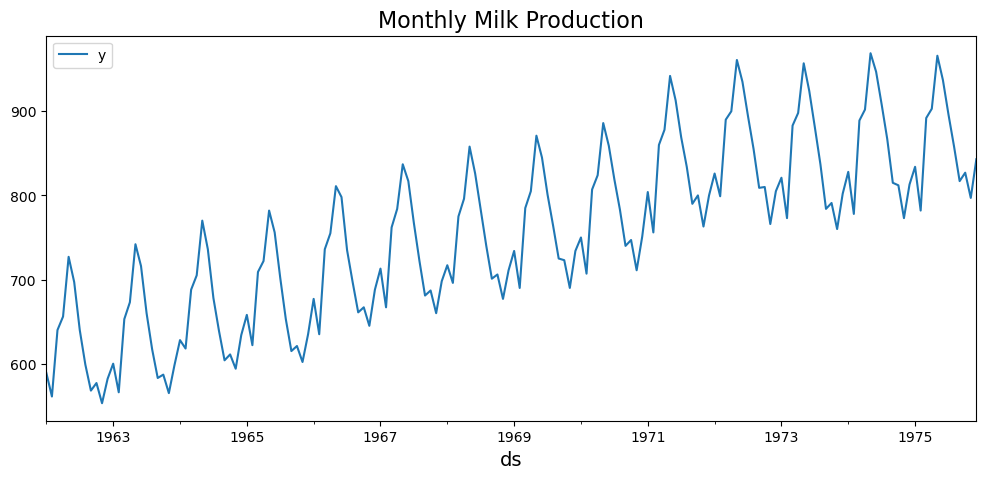

In [29]:
milk2.set_index('ds').plot(title='Monthly Milk Production');

In [30]:
from prophet import Prophet

# Initializes and fits a Prophet model on the training data
model = Prophet().fit(train)

15:21:17 - cmdstanpy - INFO - Chain [1] start processing
15:21:17 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
# Dictionary of all custom seasonalities that have been added to the Prophet model
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [32]:
# Dictionary indicating the mode used for each component
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [33]:
# Creates a future DataFrame extending the training data by the length of the test set, with monthly start ('MS') frequency
future = model.make_future_dataframe(len(test), freq='MS')  

In [34]:
# Test the future's lenght size
len(milk) == len(future)

True

In [35]:
future.shape

(168, 1)

In [36]:
# Generates forecasts for the dates in the 'future' DataFrame using the trained Prophet model
forecast = model.predict(future)

# Show the column names in 'forecast'
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [37]:
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']

In [38]:
milk.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [39]:
forecast[cols].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.844385,578.380962,596.001646
1,1962-02-01,547.435214,538.060571,556.447447
2,1962-03-01,641.448899,632.401529,650.460939
3,1962-04-01,659.259693,650.014794,668.694049
4,1962-05-01,722.327382,713.355723,731.497603


In [40]:
# Concatenates the first 5 predicted values ('yhat') with the first 5 actual training values ('y') side by side for comparison
pd.concat([forecast['yhat'].iloc[0:5], train['y'].iloc[0:5]], axis=1)  

,yhat,y
0,586.844385,589
1,547.435214,561
2,641.448899,640
3,659.259693,656
4,722.327382,727


In [41]:
# Concatenates the last 5 forecasted values ('yhat') with the last 5 actual test values ('y') side by side for comparison
pd.concat([forecast['yhat'].iloc[-5:], test['y'].iloc[-5:]], axis=1)  

,yhat,y
163,841.557057,858
164,800.475052,817
165,804.715201,827
166,773.611965,797
167,806.851275,843


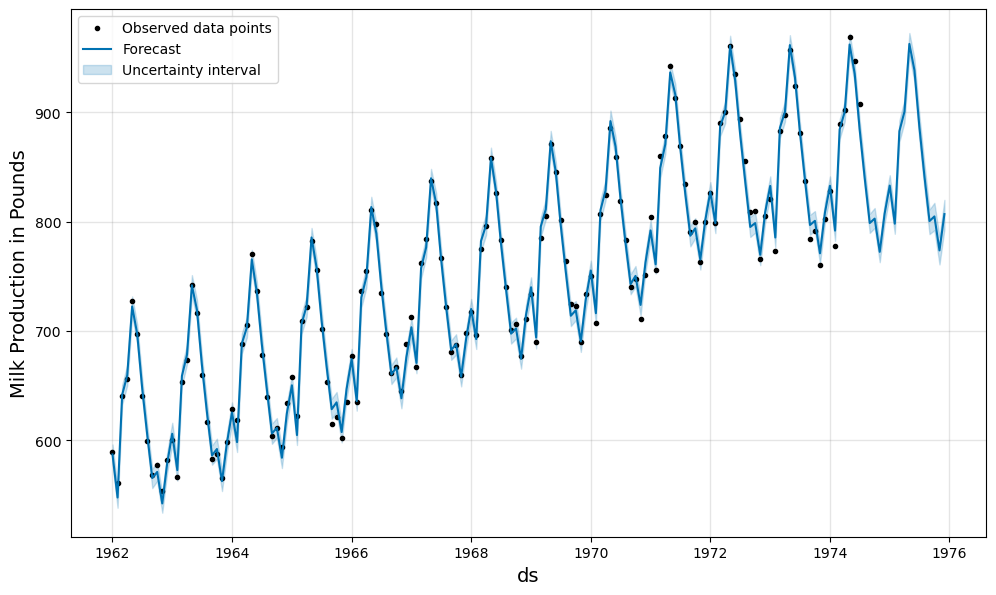

In [42]:
model.plot(forecast, ylabel='Milk Production in Pounds')
plt.legend()
plt.show()

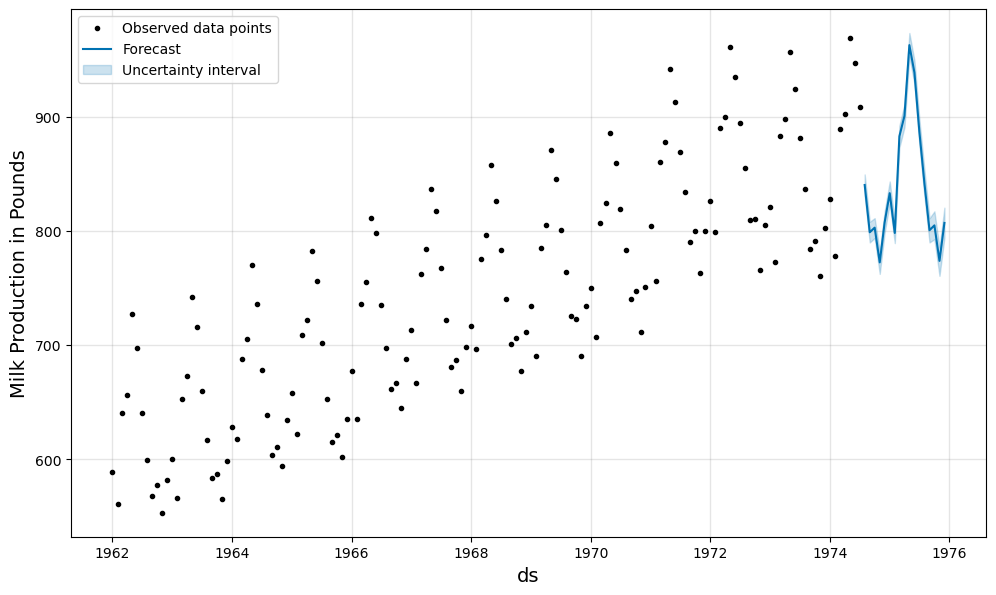

In [43]:
predicted = model.predict(test)                            # Generate predictions for the test set using the trained Prophet model
model.plot(predicted, ylabel='Milk Production in Pounds')  # Plot the forecast including uncertainty intervals with custom y-axis label
plt.legend()
plt.show()

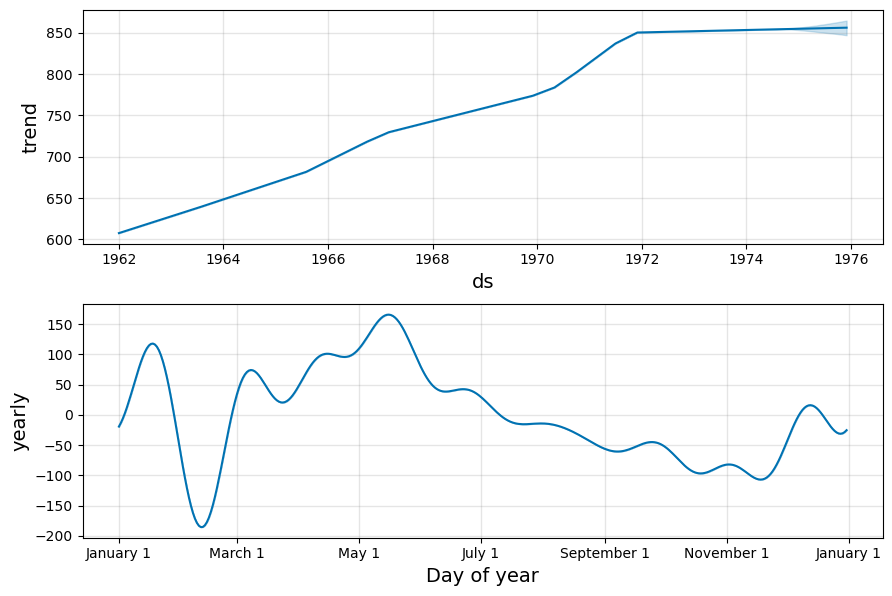

In [44]:
# Plots the individual forecast components from the forecast DataFrame
model.plot_components(forecast)  
plt.show()

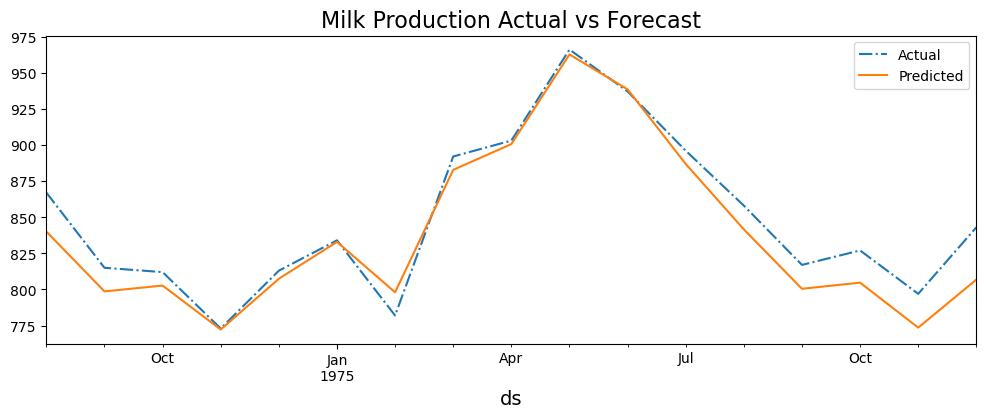

In [45]:
ax = test.plot(x='ds',                           # Plot the actual test data using the 'ds' column as x-axis
               y='y',                            # Use the 'y' column for actual values
               label='Actual',                   # Label for the legend
               style='-.',                       # Dashed-dot line style for actual values
               figsize=(12,4))                   # Set the figure size

predicted.plot(x='ds',                           # Plot the forecasted data using the same 'ds' x-axis
               y='yhat',                         # Use the 'yhat' column for predicted values
               label='Predicted',                # Label for the legend
               ax=ax)                            # Plot on the same axes as the actual values

plt.title('Milk Production Actual vs Forecast')  # Set the title of the plot
plt.show()                                       # Display the combined plot

### Change Points


Prophet’s strength lies in its ability to automatically detect changepoints,
which are points in time where the trend shifts significantly. By default,
Prophet will identify 25 potential changepoints within the first 80% of the
training data. You can modify this behavior by adjusting the
`n_changepoints` parameter or control how much historical data to use
for changepoint detection via `changepoint_range` , which defaults to
0.8 (or 80%).

In [46]:
model.changepoints.shape

(25,)

In [47]:
model.changepoints.head()

5    1962-06-01
10   1962-11-01
14   1963-03-01
19   1963-08-01
24   1964-01-01
Name: ds, dtype: datetime64[ns]

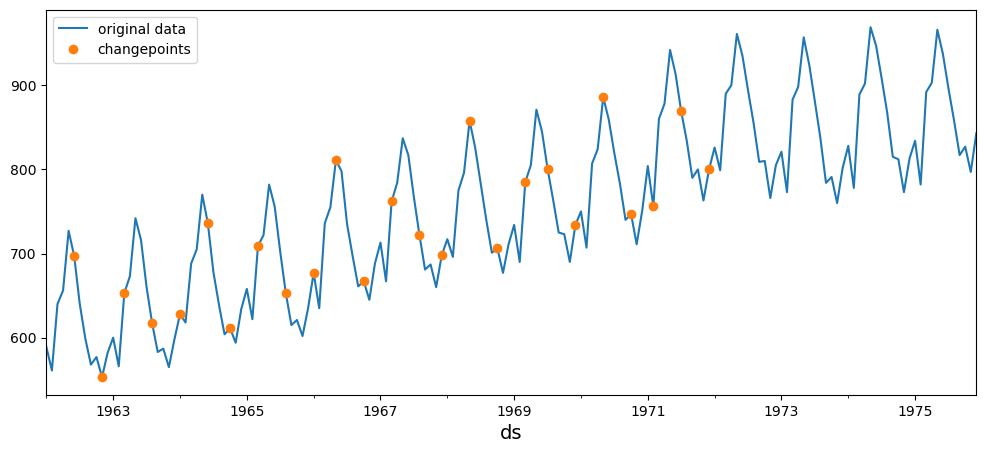

In [48]:
ax = milk2.set_index('ds').plot(figsize=(12,5))                       # Plot the original milk production time series using 'ds' as the datetime index
milk2.set_index('ds').loc[model.changepoints].plot(style='o', ax=ax)  # Plot the changepoints detected by the Prophet model as circles on the same plot
plt.legend(['original data', 'changepoints'])                        # Add legend to distinguish between the original series and the changepoints
plt.show()                                                           # Display the plot

In [49]:
model.changepoints

5     1962-06-01
10    1962-11-01
14    1963-03-01
19    1963-08-01
24    1964-01-01
29    1964-06-01
33    1964-10-01
38    1965-03-01
43    1965-08-01
48    1966-01-01
52    1966-05-01
57    1966-10-01
62    1967-03-01
67    1967-08-01
71    1967-12-01
76    1968-05-01
81    1968-10-01
86    1969-03-01
90    1969-07-01
95    1969-12-01
100   1970-05-01
105   1970-10-01
109   1971-02-01
114   1971-07-01
119   1971-12-01
Name: ds, dtype: datetime64[ns]

### There is more

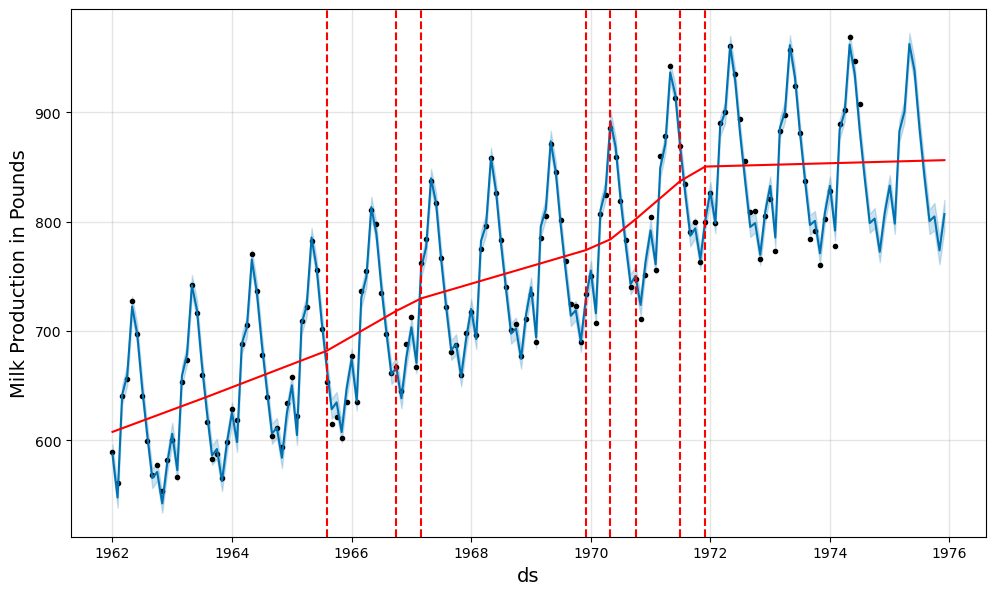

In [50]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast, ylabel='Milk Production in Pounds')     # Plot the forecast with confidence intervals and custom y-axis label
add_changepoints_to_plot(fig.gca(), model, forecast)               # Overlay detected changepoints on the forecast plot using Prophet's built-in utility
plt.show()                                                         # Display the final plot with changepoints

### Logistic Growth

15:21:18 - cmdstanpy - INFO - Chain [1] start processing
15:21:18 - cmdstanpy - INFO - Chain [1] done processing


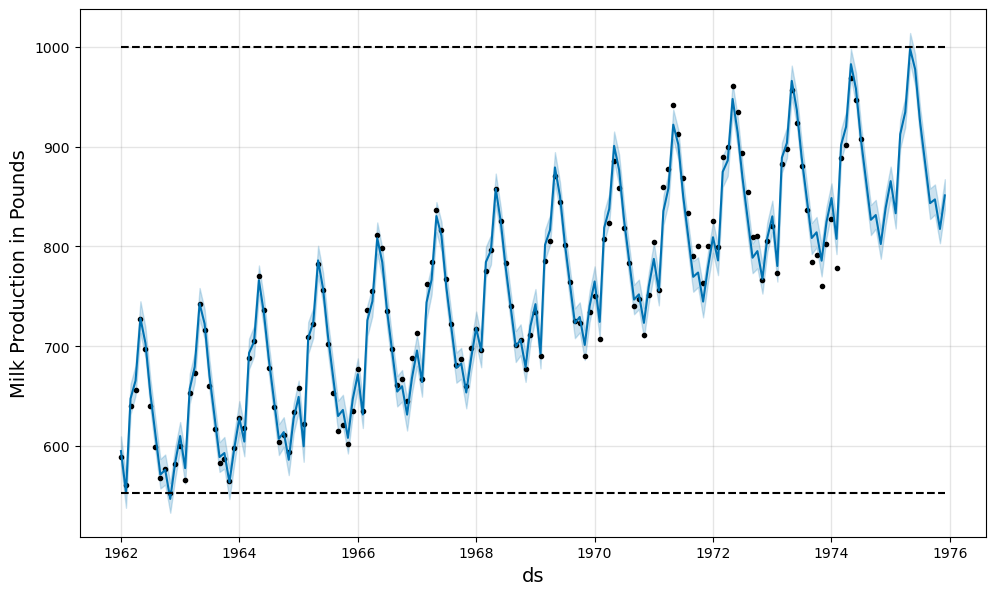

In [51]:
train['cap'] = 1000                    # Set the upper limit (capacity) for the logistic growth model
train['floor'] = train['y'].min()      # Set the lower bound for the logistic growth model as the minimum observed value

model = (                              # Initialize and fit a Prophet model with logistic growth
         Prophet(growth='logistic')    # Use logistic growth instead of linear
         .fit(train)                   # Fit the model to the training data with 'cap' and 'floor' specified
        )

future = model.make_future_dataframe(len(test), freq='MS')   # Create a future DataFrame extending into the test set with monthly frequency
future['cap'] = 1000                                         # Set the same upper limit for the future periods
future['floor'] = train['y'].min()                           # Set the same lower limit for the future periods

forecast = model.predict(future)                             # Generate forecast with logistic growth constraints

model.plot(forecast, ylabel='Milk Production in Pounds')     # Plot the forecast with confidence intervals and custom label

add_changepoints_to_plot(fig.gca(), model, forecast)         # Overlay changepoints on the forecast plot

plt.show()                                                   # Display the final plot

# Recipe 3. Forecasting Multivariate Time Series Data using VAR

**VAR(1) Formula Example**

\begin{align*}
y_{(1),t} &= \alpha_{1} + \theta_{11}y_{(1),t-1} + \theta_{12}y_{(2), t-1} + \epsilon_{(1),t} \\
y_{(2),t} &= \alpha_{2} + \theta_{21}y_{(1),t-1} + \theta_{22}y_{(2),t-1} + \epsilon_{(2),t} 
\\[1.5em]
\begin{bmatrix} y_{(1),t} \\ y_{(2),t} \end{bmatrix} &=
\begin{bmatrix} \alpha_{1} \\ \alpha_{2} \end{bmatrix} +
\begin{bmatrix} \theta_{11} & \theta_{12} \\ \theta_{21} & \theta_{22} \end{bmatrix}
\begin{bmatrix} y_{(1),t-1} \\ y_{(2), t-1} \end{bmatrix} +
\begin{bmatrix} \epsilon_{(1),t} \\ \epsilon_{(2),t} \end{bmatrix}
\end{align*}

In [52]:
import pandas_datareader.data as web
from statsmodels.tsa.api import VAR,adfuller, kpss
from statsmodels.tsa.stattools import grangercausalitytests

In [53]:
start = "01-01-1990"
end = "04-01-2022"

economic_df = web.FredReader(symbols=["FEDFUNDS", 
                                      "unrate"], 
                             start=start, 
                             end=end).read()

economic_df.head()

,FEDFUNDS,unrate
DATE,,
1990-01-01,8.23,5.4
1990-02-01,8.24,5.3
1990-03-01,8.28,5.2
1990-04-01,8.26,5.4
1990-05-01,8.18,5.4


In [54]:
economic_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 388 entries, 1990-01-01 to 2022-04-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  388 non-null    float64
 1   unrate    388 non-null    float64
dtypes: float64(2)
memory usage: 9.1 KB


In [55]:
# Explicitly sets the frequency of the DataFrame's DateTimeIndex to 'MS' (Month Start)
economic_df.index.freq = 'MS'  

economic_df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01'],
              dtype='datetime64[ns]', name='DATE', length=388, freq='MS')

In [56]:
economic_df.isna().sum()

FEDFUNDS    0
unrate      0
dtype: int64

In [57]:
economic_df.shape

(388, 2)

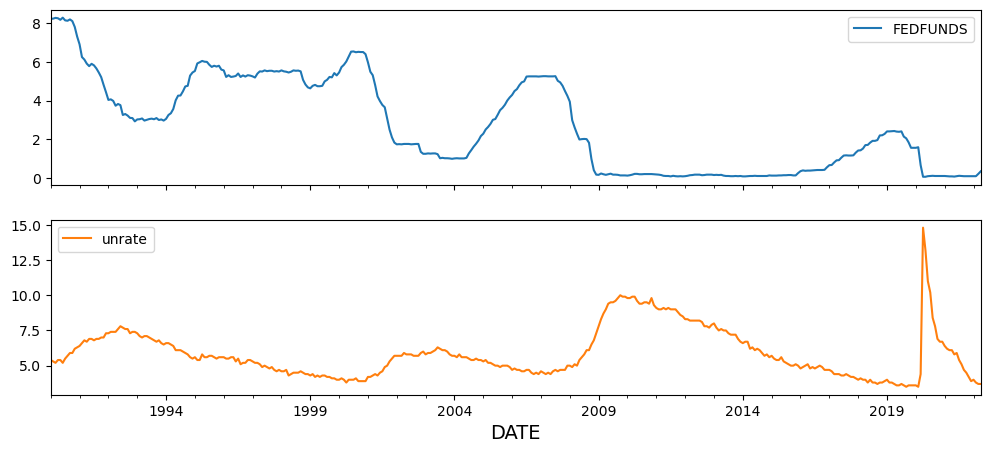

In [58]:
economic_df.plot(subplots=True)
plt.show()

In [59]:
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'
    
    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non-stationary'
    return (kpssh, adfh)

In [60]:
for i in economic_df:  #<========== Very cleaver                  
    kps, adf = check_stationarity(economic_df[i])
    print(f'{i} adf: {adf}, kpss: {kps}')

FEDFUNDS adf: Stationary, kpss: Non-stationary
unrate adf: Stationary, kpss: Stationary


The data for testing whether the time series in the second column Granger
causes the time series in the first column. Missing values are not
supported.

In [61]:
# Performs the Granger causality test to determine whether past values of 'FEDFUNDS' help predict 'unrate'
granger = grangercausalitytests(economic_df[['unrate', 'FEDFUNDS']], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5913  , p=0.4424  , df_denom=384, df_num=1
ssr based chi2 test:   chi2=0.5959  , p=0.4402  , df=1
likelihood ratio test: chi2=0.5954  , p=0.4403  , df=1
parameter F test:         F=0.5913  , p=0.4424  , df_denom=384, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=21.7672 , p=0.0000  , df_denom=381, df_num=2
ssr based chi2 test:   chi2=44.1057 , p=0.0000  , df=2
likelihood ratio test: chi2=41.7628 , p=0.0000  , df=2
parameter F test:         F=21.7672 , p=0.0000  , df_denom=381, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.6011 , p=0.0000  , df_denom=378, df_num=3
ssr based chi2 test:   chi2=66.0033 , p=0.0000  , df=3
likelihood ratio test: chi2=60.9190 , p=0.0000  , df=3
parameter F test:         F=21.6011 , p=0.0000  , df_denom=378, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.1445 , p=0.0000  

**Granger Causality Interpretation:**

At lag 1, the p-values are high (e.g., $p = 0.44$), so we fail to reject the null hypothesis — there's **no Granger causality** from `FEDFUNDS` to `unrate` at lag 1.

From lag 2 onward, all p-values are very small ($p = 0.0000$) across all test types — this means we **reject the null hypothesis**, suggesting that:

$$
\texttt{FEDFUNDS} \Rightarrow \texttt{unrate} \quad \text{for lags } \geq 2
$$

In other words, past values of the federal funds rate help predict the unemployment rate.


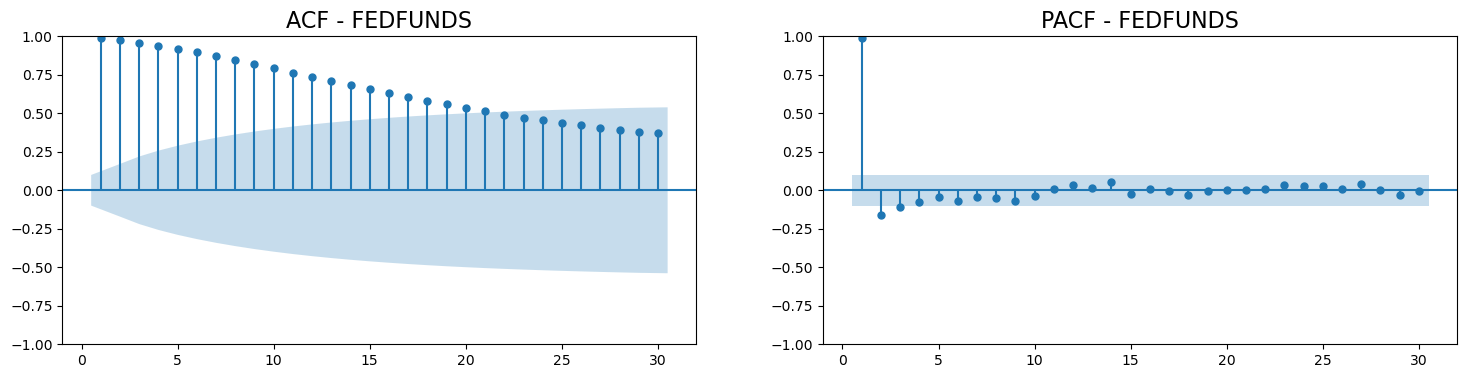

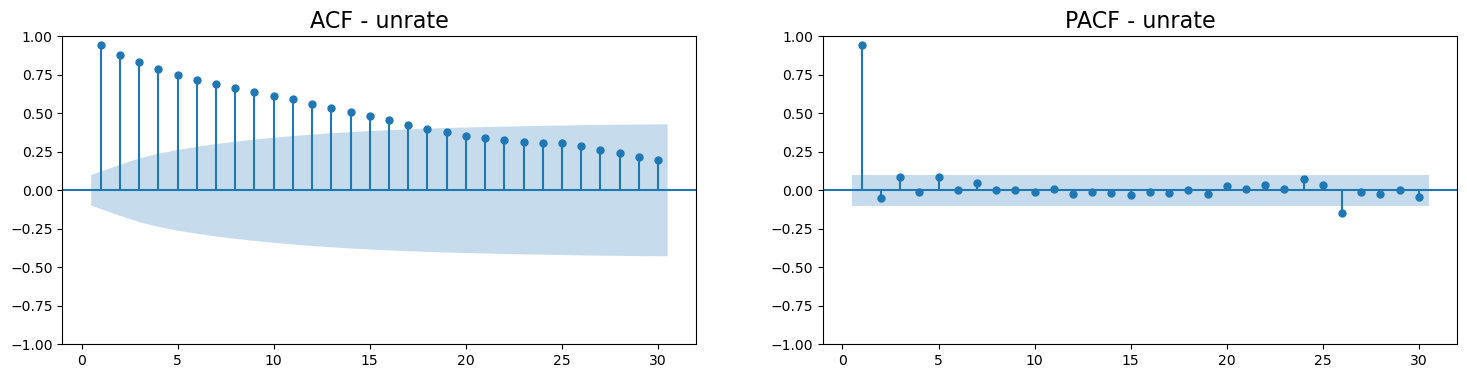

In [62]:
for col in economic_df.columns:  #<========= Very Cleaver
    fig, ax = plt.subplots(1,2, figsize=(18,4))
    plot_acf(economic_df[col], zero=False, 
             lags=30, ax=ax[0], title=f'ACF - {col}')
    plot_pacf(economic_df[col], zero=False, 
              lags=30, ax=ax[1], title=f'PACF - {col}');plt.show()

In [63]:
train = economic_df.loc[:'2019']  # From the beginning to the end of 2019 for training
test = economic_df.loc['2020':]   # From 2020 onward for testing

In [64]:
train.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='DATE', length=360, freq='MS')

In [65]:
test.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01'],
              dtype='datetime64[ns]', name='DATE', freq='MS')

In [66]:
print(f'Train: {len(train)}, Test: {len(test)}')

Train: 360, Test: 28


In [67]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()                           # Create a StandardScaler to normalize the features (mean = 0, std = 1)
scale.fit(train)                                   # Fit the scaler using the training data statistics only

train_sc = pd.DataFrame(scale.transform(train),    # Apply the scaler to the training data
                        index=train.index,         # Preserve the original training index
                        columns=train.columns)     # Preserve the original training column names

test_sc = pd.DataFrame(scale.transform(test),      # Apply the same scaling (based on training data) to the test data
                       index=test.index,           # Preserve the original test index
                       columns=test.columns)       # Preserve the original test column names

In [68]:
test[0:5]

,FEDFUNDS,unrate
DATE,,
2020-01-01,1.55,3.6
2020-02-01,1.58,3.5
2020-03-01,0.65,4.4
2020-04-01,0.05,14.8
2020-05-01,0.05,13.2


In [69]:
# Reverses the standardization on the first 5 rows of the scaled test data to return them to their original scale
scale.inverse_transform(test_sc)[0:5]  

array([[ 1.55,  3.6 ],
       [ 1.58,  3.5 ],
       [ 0.65,  4.4 ],
       [ 0.05, 14.8 ],
       [ 0.05, 13.2 ]])

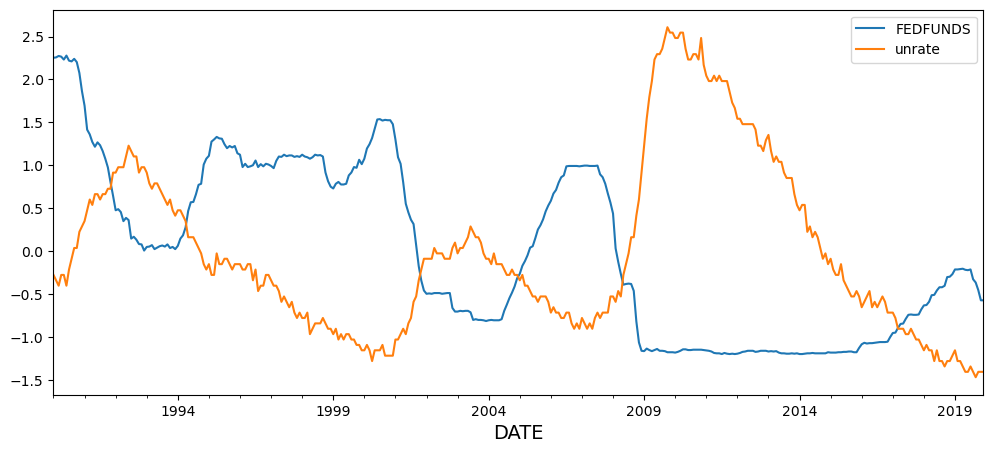

In [70]:
train_sc.plot();

In [71]:
train_sc.shape

(360, 2)

In [72]:
test_sc.shape

(28, 2)

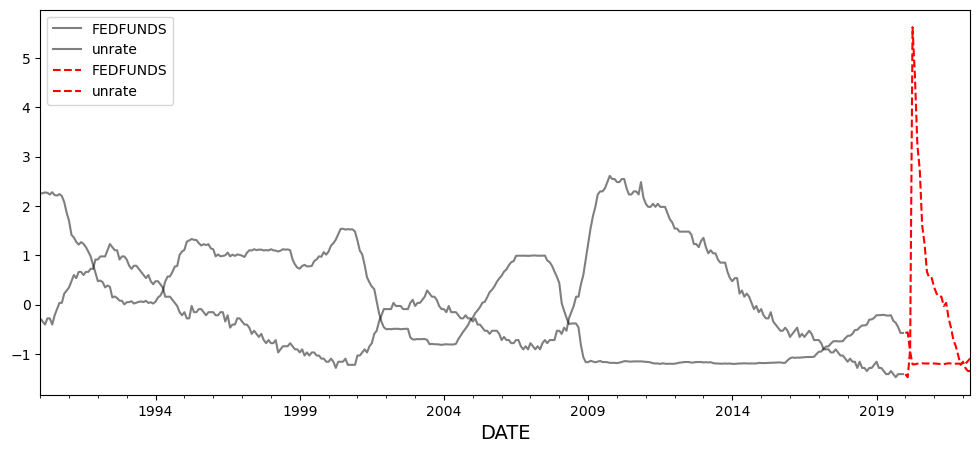

In [73]:
ax = train_sc.plot(style='k', alpha=0.5, label='train')
test_sc.plot(ax=ax, style='r--', label='test')
plt.show()

In [74]:
model = VAR(endog=train_sc)           # Initializes a VAR model using the standardized training data as endogenous variables
res = model.select_order(maxlags=10)  # Selects the optimal lag order by evaluating multiple criteria (AIC, BIC, HQIC, FPE) up to 10 lags
res.summary()                         # Displays a summary table showing the values of each criterion for lags 0 through 10

,AIC,BIC,FPE,HQIC
0,-0.3447,-0.3227,0.7084,-0.3360
1,-9.991,-9.925,4.579e-05,-9.965
2,-10.52,-10.41,2.711e-05,-10.47
3,-10.56,-10.41,2.590e-05,-10.50
4,-10.61,-10.41*,2.468e-05,-10.53*
5,-10.61,-10.36,2.475e-05,-10.51
6,-10.62,-10.34,2.431e-05,-10.51
7,-10.66*,-10.32,2.358e-05*,-10.52
8,-10.64,-10.26,2.402e-05,-10.49
9,-10.63,-10.21,2.429e-05,-10.46


In [75]:
res.selected_orders

{'aic': 7, 'bic': 4, 'hqic': 4, 'fpe': 7}

In [76]:
print(f'AIC: {res.aic} , BIC: {res.bic}, HQ: {res.hqic}, FPE: {res.fpe}')

AIC: 7 , BIC: 4, HQ: 4, FPE: 7


In [77]:
# Fits the VAR model using up to 7 lags and selects the optimal lag length based on the AIC criterion
results = model.fit(maxlags=7, ic='aic')   

# Displays the summary of the fitted VAR model
results.summary()                          

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, Mar, 2025
Time:                     15:21:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.3234
Nobs:                     353.000    HQIC:                  -10.5212
Log likelihood:           908.302    FPE:                2.36566e-05
AIC:                     -10.6520    Det(Omega_mle):     2.17674e-05
--------------------------------------------------------------------
Results for equation FEDFUNDS
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.002751         0.002960           -0.929           0.353
L1.FEDFUNDS         1.438116         0.053641           26.810           0.000
L1.unrate          -0.073048         0.033805           -2.161   

In [78]:
type(results)

statsmodels.tsa.vector_ar.var_model.VARResultsWrapper

In [79]:
# Retrieves the number of lags actually used in the fitted VAR model
lag_order = results.k_ar
lag_order

7

### VAR(7) Model Equations

Let:
- $y_{(1),t}$ = `unrate` at time $t$  
- $y_{(2),t}$ = `FEDFUNDS` at time $t$

Then the system of equations is:
$$
\begin{aligned}
y_{(1),t} &= \alpha_1 + \sum_{i=1}^{7} \left( \theta_{11}^{(i)} y_{(1),t-i} + \theta_{12}^{(i)} y_{(2),t-i} \right) + \epsilon_{(1),t} \\
y_{(2),t} &= \alpha_2 + \sum_{i=1}^{7} \left( \theta_{21}^{(i)} y_{(1),t-i} + \theta_{22}^{(i)} y_{(2),t-i} \right) + \epsilon_{(2),t}
\end{aligned}
$$
Where:
- $\alpha_1, \alpha_2$ are intercepts  
- $\theta_{jk}^{(i)}$ is the coefficient of the $i$-th lag of variable $k$ in equation $j$  
- $\epsilon_{(1),t}, \epsilon_{(2),t}$ are the error terms (white noise)


In [80]:
# Estimated coefficients from the fitted VAR model
results.params

,FEDFUNDS,unrate
const,-0.002751,-0.004523
L1.FEDFUNDS,1.438116,-0.232148
L1.unrate,-0.073048,0.936389
L2.FEDFUNDS,-0.312593,0.342040
L2.unrate,0.059443,0.126119
L3.FEDFUNDS,-0.001352,-0.269957
L3.unrate,-0.020940,0.037521
L4.FEDFUNDS,-0.279922,0.210895
L4.unrate,0.037971,-0.034145
L5.FEDFUNDS,0.157904,-0.160061


In [81]:
# Selects the last `lag_order` rows from the standardized training data
train_sc[-lag_order:]

,FEDFUNDS,unrate
DATE,,
2019-06-01,-0.221874,-1.406305
2019-07-01,-0.213414,-1.343570
2019-08-01,-0.327635,-1.406305
2019-09-01,-0.365709,-1.469039
2019-10-01,-0.454548,-1.406305
2019-11-01,-0.573000,-1.406305
2019-12-01,-0.573000,-1.406305


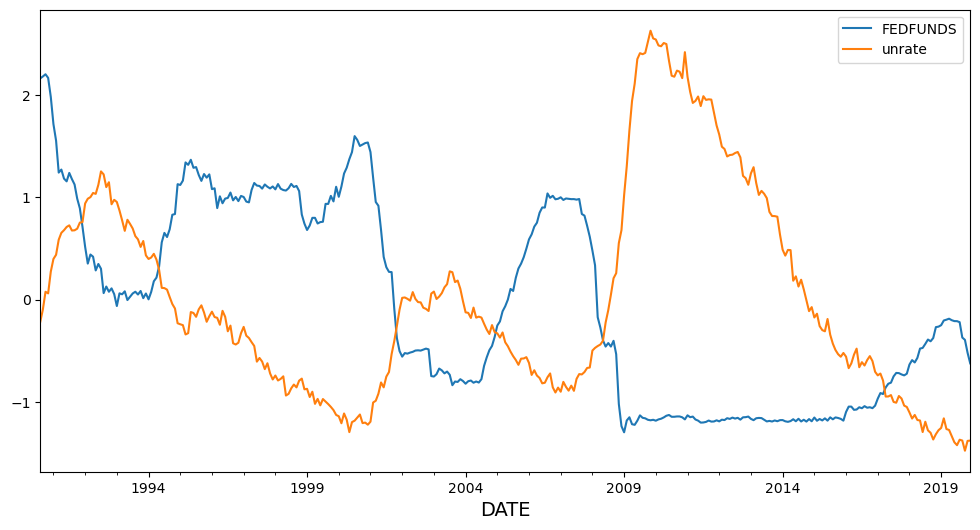

In [82]:
# Plots the in-sample fitted values (predictions) of the VAR model for each variable over time
results.fittedvalues.plot(figsize=(12,6));

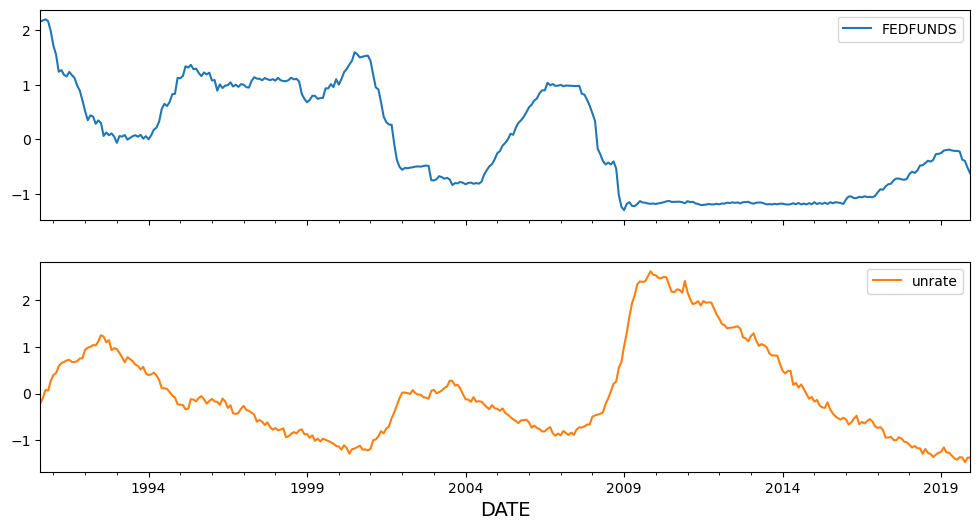

In [83]:
# Plots the in-sample fitted values (predictions) of the VAR model for each variable over time
results.fittedvalues.plot(figsize=(12,6), subplots=True);

In [84]:
# Displays the first 10 rows of the forecasted values generated by the VAR model
forecast[0:10]

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,618.786397,1000,553,580.715054,609.584040,618.786397,618.786397,-23.899574,-23.899574,-23.899574,-23.899574,-23.899574,-23.899574,0.0,0.0,0.0,594.886823
1,1962-02-01,619.987008,1000,553,537.953978,570.373254,619.987008,619.987008,-66.345374,-66.345374,-66.345374,-66.345374,-66.345374,-66.345374,0.0,0.0,0.0,553.641634
2,1962-03-01,621.086892,1000,553,631.601727,662.142514,621.086892,621.086892,26.296580,26.296580,26.296580,26.296580,26.296580,26.296580,0.0,0.0,0.0,647.383472
3,1962-04-01,622.321853,1000,553,650.634402,680.666237,622.321853,622.321853,43.182209,43.182209,43.182209,43.182209,43.182209,43.182209,0.0,0.0,0.0,665.504062
4,1962-05-01,623.534330,1000,553,713.178985,745.071567,623.534330,623.534330,104.466934,104.466934,104.466934,104.466934,104.466934,104.466934,0.0,0.0,0.0,728.001265
5,1962-06-01,624.805271,1000,553,688.414500,718.931908,624.805271,624.805271,78.326653,78.326653,78.326653,78.326653,78.326653,78.326653,0.0,0.0,0.0,703.131923
6,1962-07-01,626.052783,1000,553,637.915181,667.899994,626.052783,626.052783,27.076019,27.076019,27.076019,27.076019,27.076019,27.076019,0.0,0.0,0.0,653.128802
7,1962-08-01,627.360139,1000,553,596.029405,627.562972,627.360139,627.360139,-15.530245,-15.530245,-15.530245,-15.530245,-15.530245,-15.530245,0.0,0.0,0.0,611.829894
8,1962-09-01,628.686157,1000,553,557.315256,586.934542,628.686157,628.686157,-57.340961,-57.340961,-57.340961,-57.340961,-57.340961,-57.340961,0.0,0.0,0.0,571.345196
9,1962-10-01,629.987259,1000,553,561.186575,591.417960,629.987259,629.987259,-53.993608,-53.993608,-53.993608,-53.993608,-53.993608,-53.993608,0.0,0.0,0.0,575.993651


**Manually creating a similar plot**

In [85]:
past_y = train_sc[-lag_order:].values    # Extracts the last 'lag_order' rows from the standardized training set as the initial input for forecasting
n = test_sc.shape[0]                     # Determines how many steps ahead to forecast based on the number of rows in the standardized test set

forecast = results.forecast_interval(    # Generates forecasts with confidence intervals from the VAR model
    past_y,                              # Initial lagged observations (used to start the forecast)
    n)                                   # Number of future time steps to forecast (same as test set length)

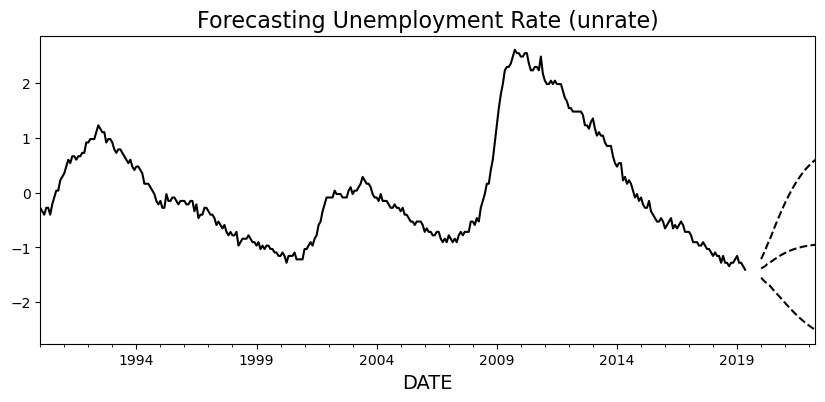

In [86]:
# Generate forecast, lower and upper bounds using the VAR model
forecast, lower, upper = results.forecast_interval(past_y, steps=n)  

idx = test.index     # Get the datetime index of the test set for alignment
style = 'k--'         # Set dashed black line style for forecast and bounds

# Plot historical (standardized) FEDFUNDS up to the lag window
ax = train_sc.iloc[:-lag_order, 1].plot(figsize=(10, 4), style='k') 

pred_forecast = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style=style)  # Plot forecast for FEDFUNDS
pred_lower    = pd.Series(lower[:, 1], index=idx).plot(ax=ax, style=style)     # Plot lower confidence interval
pred_upper    = pd.Series(upper[:, 1], index=idx).plot(ax=ax, style=style)     # Plot upper confidence interval

plt.title('Forecasting Unemployment Rate (unrate)')  # Set the plot title
plt.show()                                           # Display the forecast plot with confidence bounds

Alternatively you can also use `fill_between`

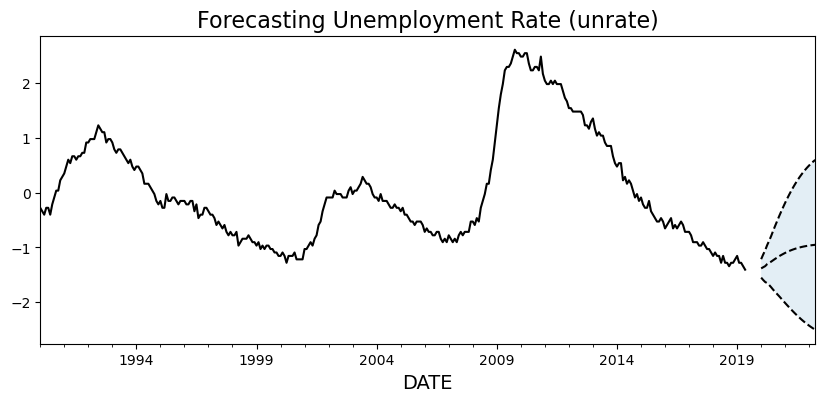

In [87]:
# Generate forecast, lower and upper bounds using the VAR model
forecast, lower, upper = results.forecast_interval(past_y, steps=n)  

idx = test.index  # Get the datetime index of the test set for alignment
style = 'k--'     # Set dashed black line style for forecast and bounds

# Plot historical (standardized) FEDFUNDS up to the lag window
ax = train_sc.iloc[:-lag_order, 1].plot(figsize=(10, 4), style='k') 

pred_forecast = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style=style)  # Plot forecast for FEDFUNDS
pred_lower    = pd.Series(lower[:, 1], index=idx).plot(ax=ax, style=style)     # Plot lower confidence interval
pred_upper    = pd.Series(upper[:, 1], index=idx).plot(ax=ax, style=style)     # Plot upper confidence interval

plt.fill_between(idx, lower[:,1], upper[:,1], alpha=0.12) # Fill_between

plt.title('Forecasting Unemployment Rate (unrate)')       # Set the plot title
plt.show()                                                # Display the forecast plot with confidence bounds

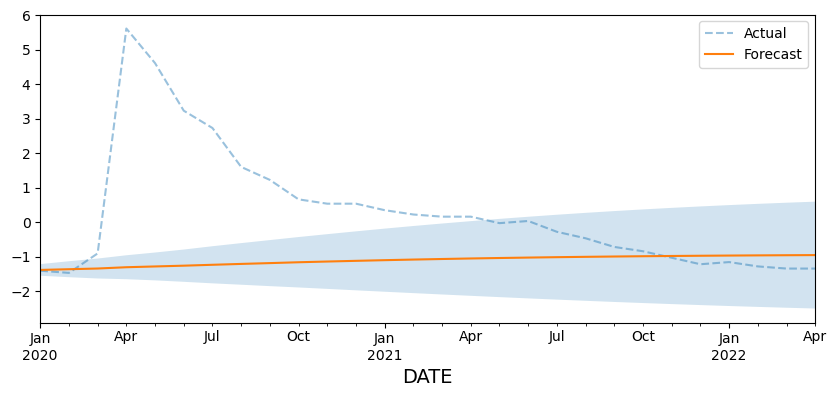

In [88]:
# Plot the actual (standardized) unemployment rate from the test set with dashed style and some transparency
test_sc['unrate'].plot(style='--', alpha=0.45, figsize=(10, 4)) 

pd.Series(forecast[:, 1], index=test_sc.index).plot()        # Plot the forecasted values for 'FEDFUNDS' (column 1) on the same axes

plt.fill_between(idx, lower[:, 1], upper[:, 1], alpha=0.2)   # Add shaded confidence interval between lower and upper bounds for 'FEDFUNDS'

plt.legend(['Actual', 'Forecast']);                          # Add a legend to differentiate actual and forecast lines

## There is more
* Comparing the results from VAR(7) with an AR(7) 
* AR(7) is a univariate this way we are comparing using one variable (unrate) to see if using two variables are better or not
* Using ARIMA(7, 0, 0) indicates an AR(7)

In [89]:
from statsmodels.tsa.arima.model import ARIMA

In [90]:
model = ARIMA(train_sc['unrate'],             # Use the standardized 'unrate' series from the training data
              order=(lag_order, 0, 0)).fit()  # Fit an ARIMA model with AR term (p=7), no differencing (d=0), and no MA term (q=0)

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 unrate   No. Observations:                  360
Model:                 ARIMA(7, 0, 0)   Log Likelihood                 366.178
Date:                Fri, 21 Mar 2025   AIC                           -714.356
Time:                        15:21:21   BIC                           -679.381
Sample:                    01-01-1990   HQIC                          -700.449
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0988      0.448     -0.221      0.825      -0.976       0.779
ar.L1          0.9498      0.046     20.467      0.000       0.859       1.041
ar.L2          0.1653      0.068      2.413      0.016       0.031       0.300
ar.L3          0.0285      0.077      0.372      0.710      -0.122       0.178
ar.L4         -0.0322      0.074     -0.433      0.665      -0.178       0.113
ar.L5          0.0522      0.071      0.735      0.462      -0.087       0.191
ar.L6         -0.0028      0.075     -0.037      0.970      -0.150       0.144
ar.L7         -0.1720      0.051     -3.352      0.001      -0.273      -0.071
sigma2         0.0075      0.001     14.489      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.97
Prob(Q):                              0.88   Prob(JB):                         0.03
Heteroskedasticity (H):               1.13   Skew:                             0.21
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

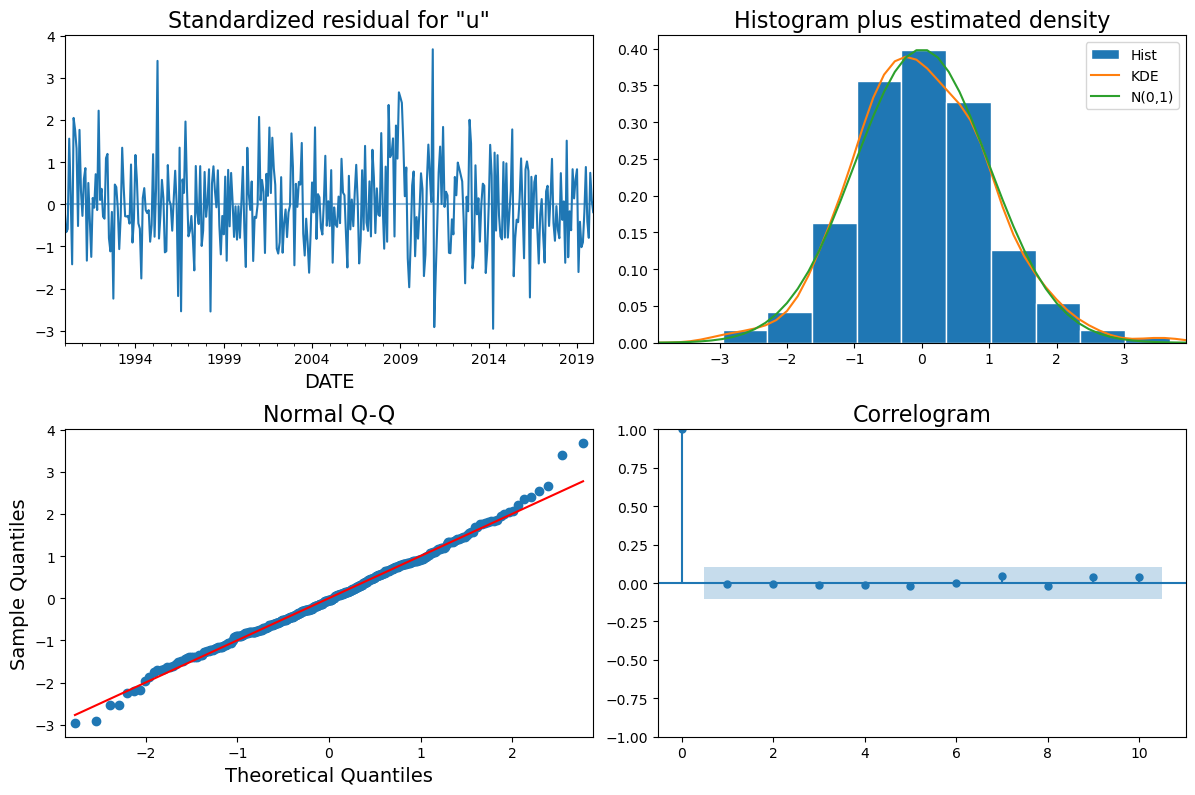

In [92]:
fig = model.plot_diagnostics(figsize=(12,8));
fig.tight_layout()
plt.show()

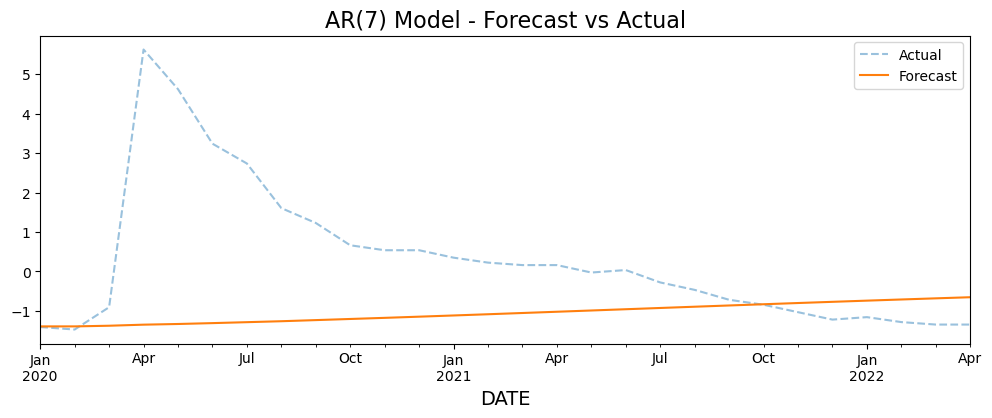

In [93]:
# Plotting the results from an AR(7)

plt.title('AR(7) Model - Forecast vs Actual')                     # Set the plot title to indicate it's from an AR(7) model
test_sc['unrate'].plot(style='--', alpha=0.45, figsize=(12, 4))   # Plot the actual (standardized) unemployment rate from the test set with dashed line
pd.Series(model.forecast(n), index=test_sc.index).plot()          # Plot the forecasted values from the AR(7) model on the same time index
plt.legend(['Actual', 'Forecast']);                               # Add a legend to distinguish actual vs forecast

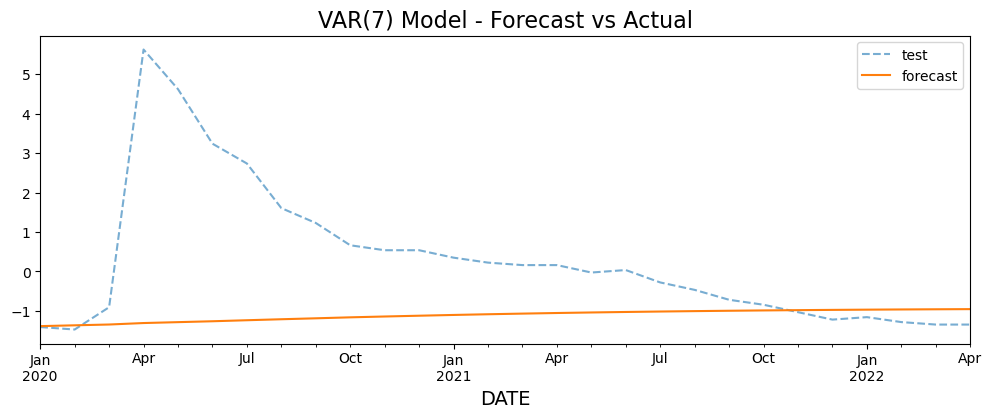

In [94]:
index = test_sc.index                                              # Store the datetime index of the standardized test set
plt.title('VAR(7) Model - Forecast vs Actual')                     # Set the title for the VAR(7) forecast plot
ax = test_sc['unrate'].plot(style='--', alpha=0.6, figsize=(12,4)) # Plot the actual standardized 'unrate' from the test set with dashed style
pd.Series(forecast[:, 1], index=index).plot(style='-', ax=ax)      # Plot the VAR(7) forecast for 'FEDFUNDS' (column 1) with a solid line
plt.legend(['test', 'forecast'])                                   # Add legend to differentiate test data and forecast
plt.show()                                                         # Display the plot

In [95]:
from statsmodels.tools.eval_measures import mse

# Calculates the Root Mean Squared Error (RMSE) between the actual 'unrate' values and the forecasted 'FEDFUNDS' values
np.sqrt(mse(test['unrate'], forecast[:, 1]))

7.974976295939229

In [96]:
# Calculates the Root Mean Squared Error (RMSE) between the actual 'unrate' values and the AR model's forecast over 'n' steps
np.sqrt(mse(test['unrate'], model.forecast(n)))  

7.947310827598132

# Recipe 4. Evaluating vector autoregressive (VAR) models

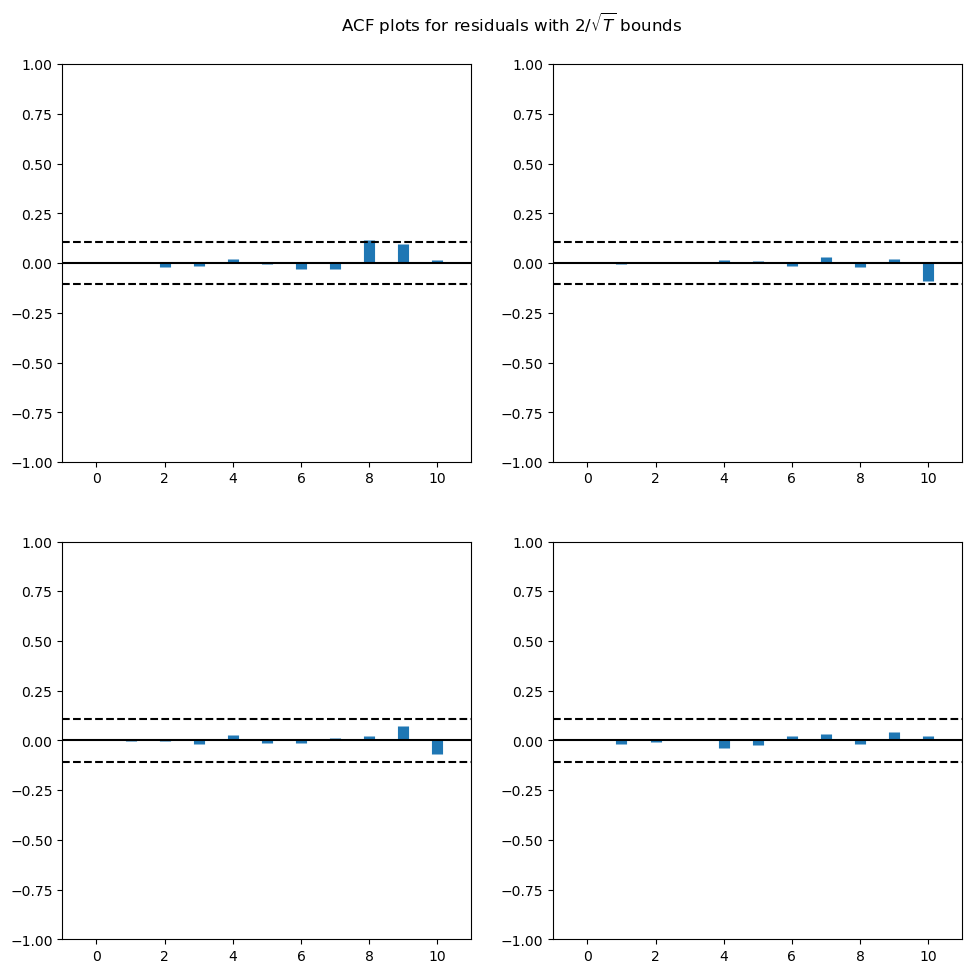

In [97]:
# Plots the autocorrelation of the residuals for each variable in the VAR model
results.plot_acorr(resid=True)  
plt.show()

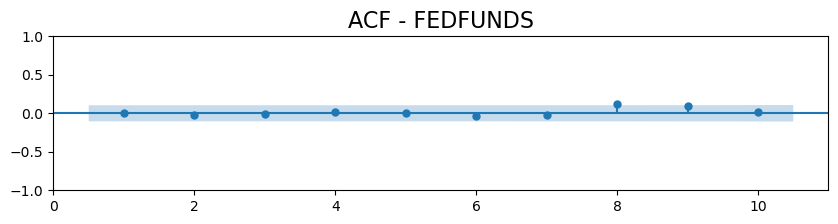

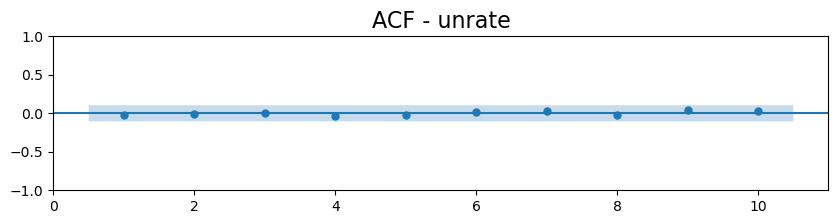

In [98]:
# You can plot your ACF on the resiuals as well using results.resid

for col in results.resid.columns:                   # Iterate over each variable's residuals in the VAR model
    fig, ax = plt.subplots(1, 1, figsize=(10, 2))   # Create a separate plot for each residual ACF with specified size
    plot_acf(results.resid[col],                    # Plot the autocorrelation function (ACF) for the residuals of the current variable
             zero=False,                            # Exclude lag 0 from the plot
             lags=10,                               # Show autocorrelations up to 10 lags
             ax=ax,                                 # Use the current subplot axis
             title=f'ACF - {col}')                  # Set the title to indicate the variable being plotted

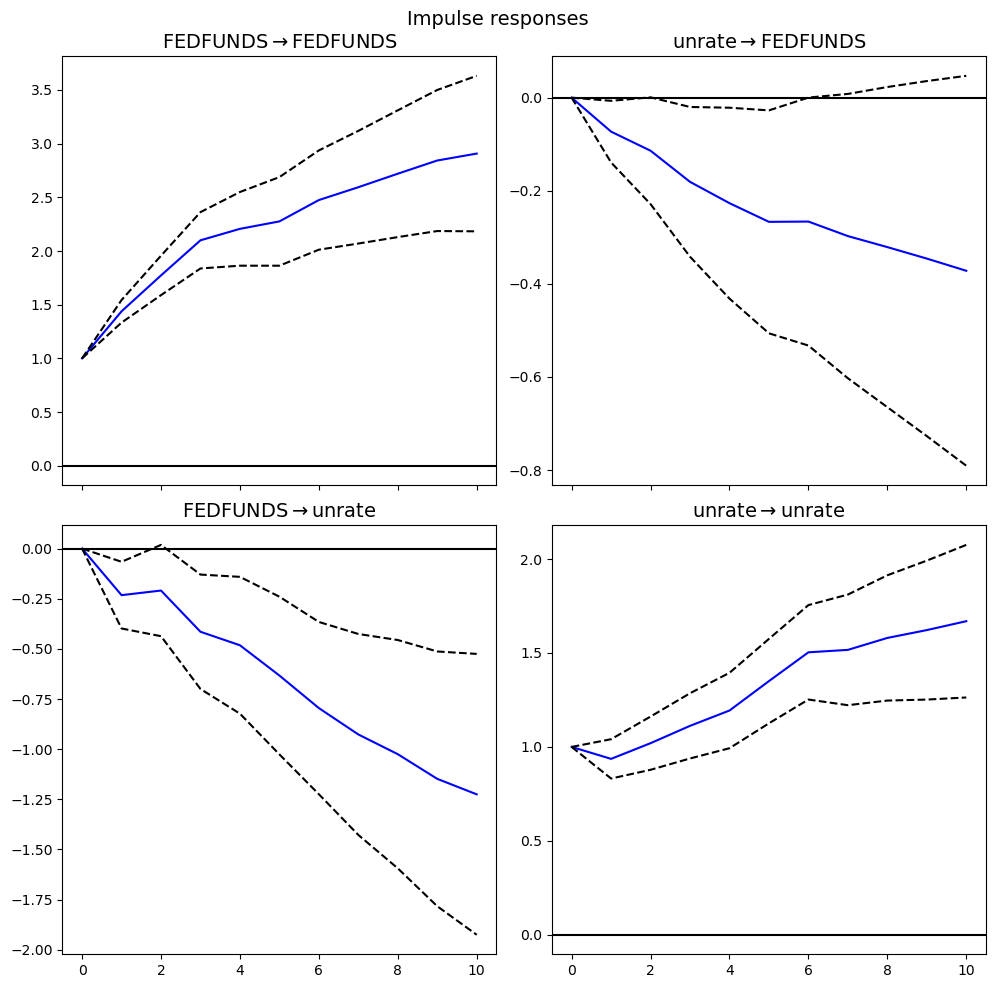

In [99]:
irf = results.irf()                               # Computes the impulse response functions (IRFs) for the fitted VAR model
fig = irf.plot(subplot_params={'fontsize': 14})   # Plots the IRFs for each variable's response to shocks, with font size set to 14
fig.tight_layout()                                # Adjusts subplot spacing to prevent overlap
plt.show()                                        # Displays the IRF plots

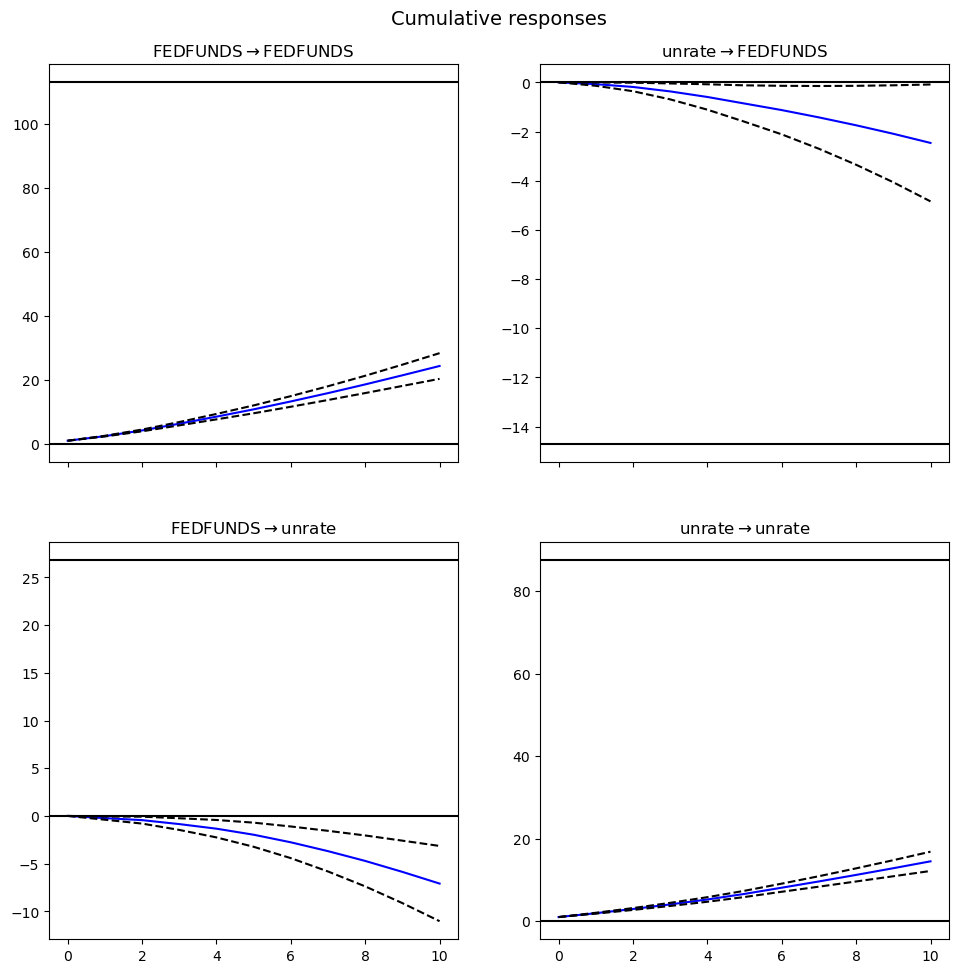

In [100]:
# Plots the cumulative impulse response functions, showing the accumulated effect of a one-time shock in one variable on others over time
irf.plot_cum_effects()
plt.show()

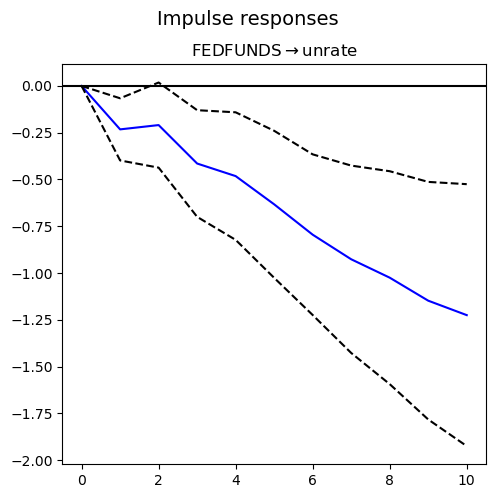

In [101]:
#  How the unemployment rate (unrate) responds over time to a one-time shock in the federal funds rate (FEDFUNDS)
fig = irf.plot(impulse='FEDFUNDS', response='unrate', figsize=(5, 5))
fig.tight_layout()
plt.show()

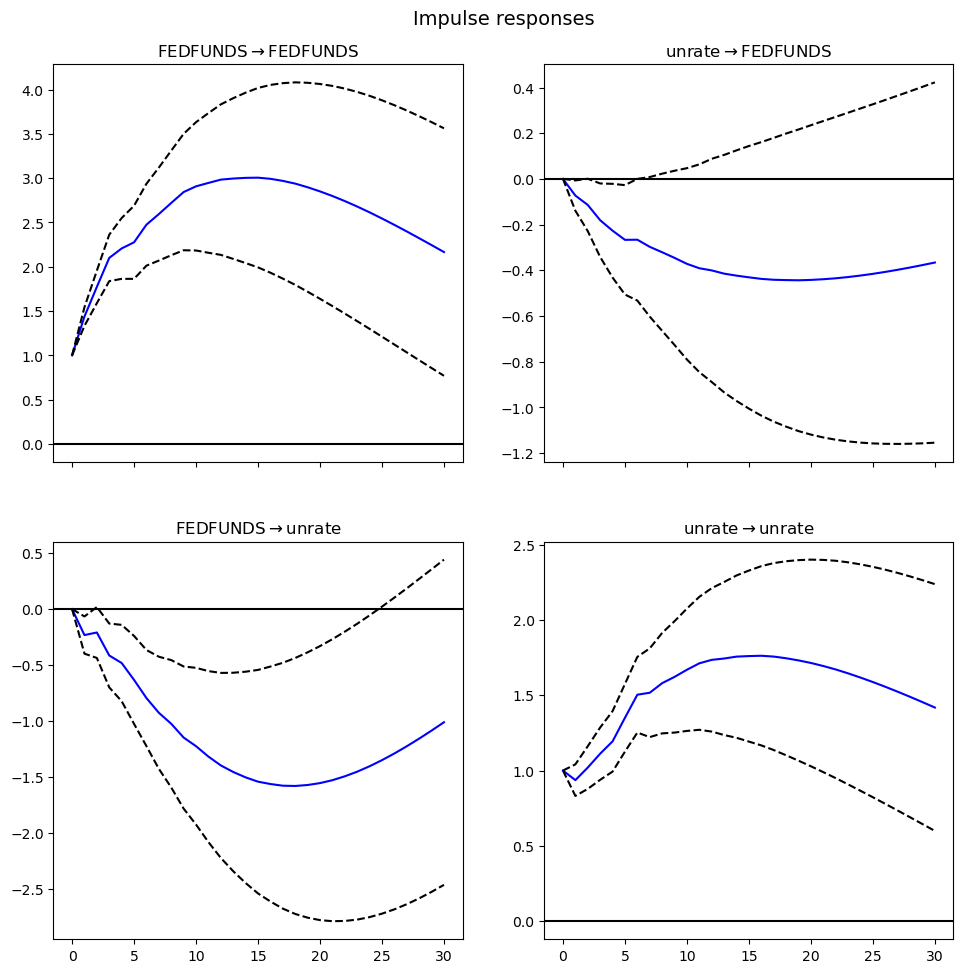

In [102]:
# Example changing lag value
irf = results.irf(30)  # Computes impulse response functions over a longer horizon of 30 periods (e.g., months)
irf.plot();            # Plots the IRFs for each variable's response to shocks over 30 time steps

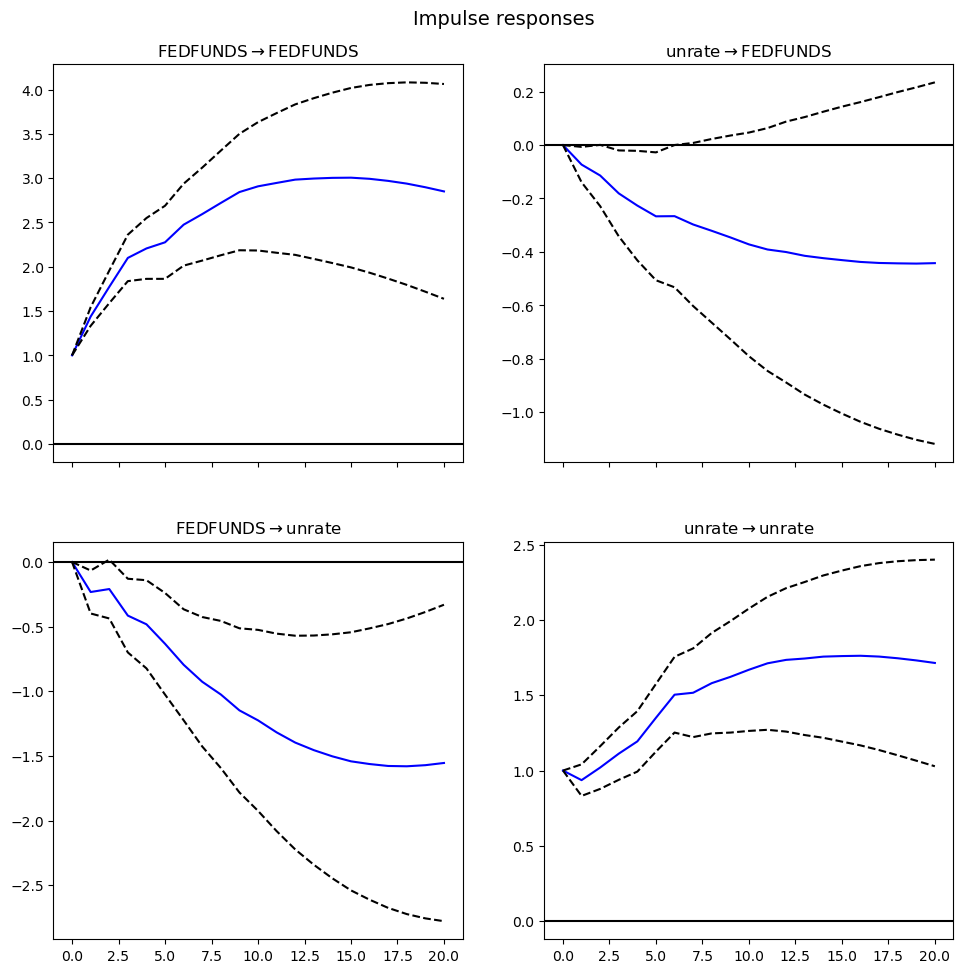

In [103]:
# Example changing lag value
irf = results.irf(20)   # Computes impulse response functions over 20 periods after the initial shock
irf.plot()              # Plots the IRFs showing each variable's dynamic response to shocks from all other variables
plt.show()              # Displays the plot

In [104]:
# Computes the Forecast Error Variance Decomposition (FEVD) from the fitted VAR model
fv = results.fevd() 

# Displays a summary of how much of each variable’s forecast error variance is explained by shocks to each variable over time
fv.summary()        

FEVD for FEDFUNDS
     FEDFUNDS    unrate
0    1.000000  0.000000
1    0.995669  0.004331
2    0.992666  0.007334
3    0.988103  0.011897
4    0.983701  0.016299
5    0.979381  0.020619
6    0.977638  0.022362
7    0.975707  0.024293
8    0.973980  0.026020
9    0.972358  0.027642

FEVD for unrate
     FEDFUNDS    unrate
0    0.000121  0.999879
1    0.009906  0.990094
2    0.011339  0.988661
3    0.022599  0.977401
4    0.031457  0.968543
5    0.042656  0.957344
6    0.055383  0.944617
7    0.069314  0.930686
8    0.081861  0.918139
9    0.094864  0.905136




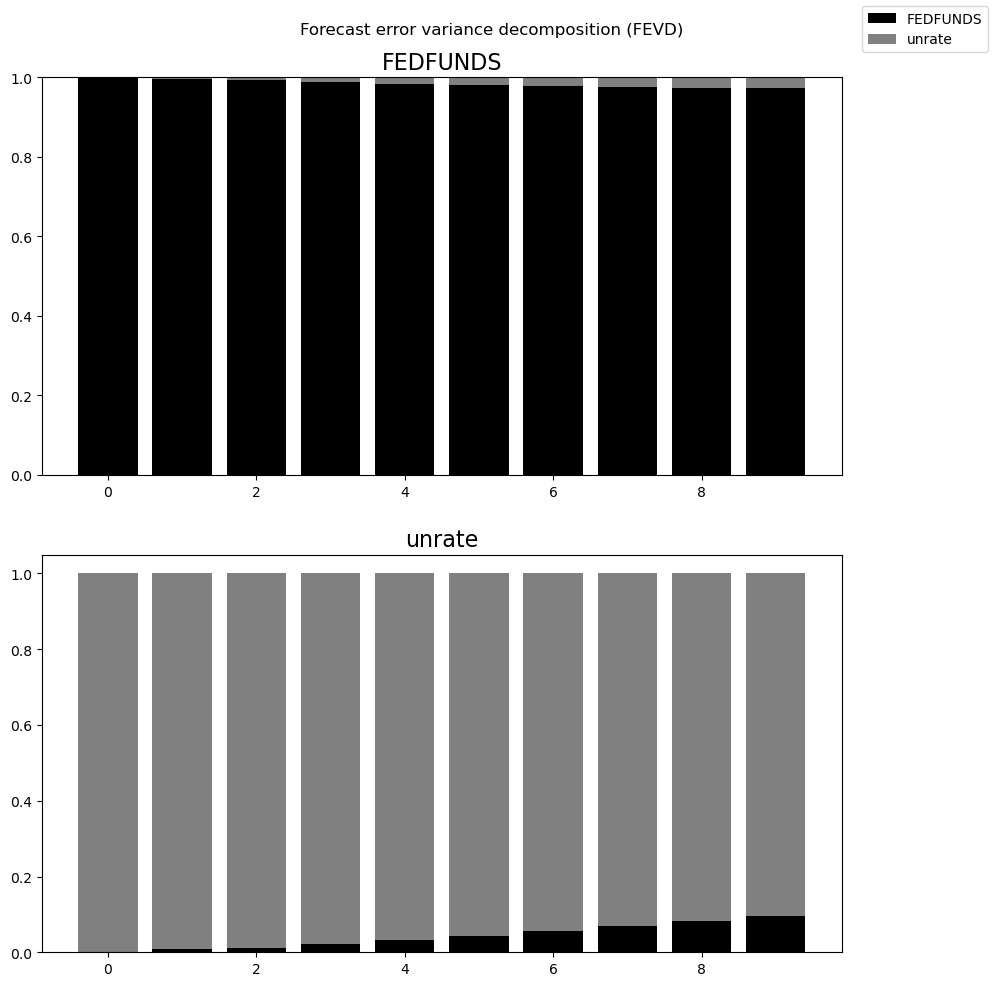

In [105]:
fv.plot()
plt.show();

In [106]:
results

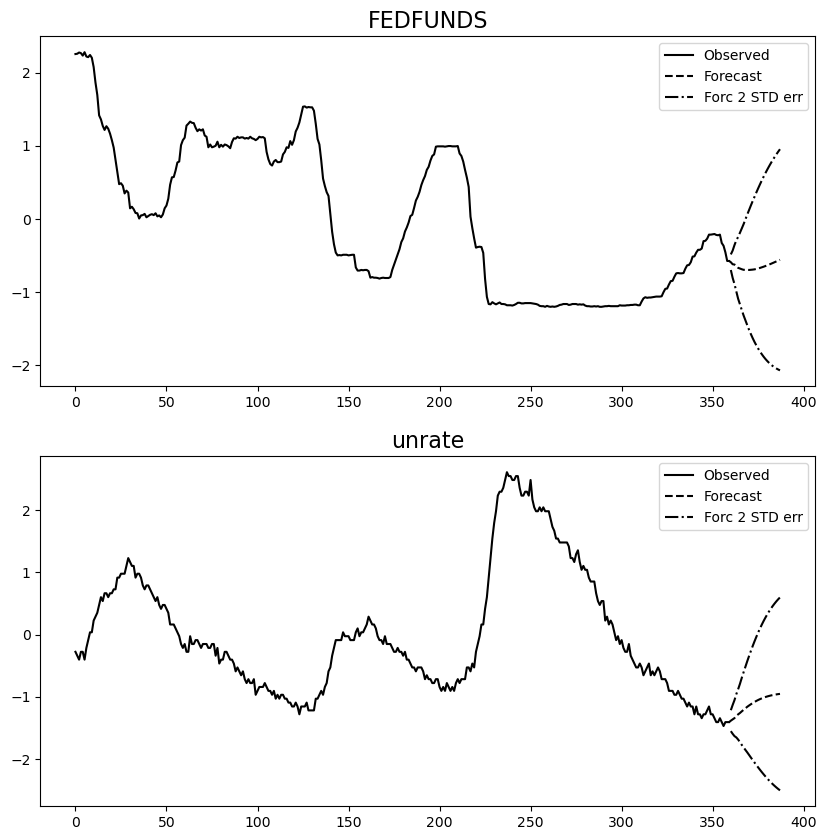

In [107]:
results.plot_forecast(n, plot_stderr=True);

# Recipe 5. Forecasting Volatility in Financial Time Series Data with GARCH

In [108]:
import arch
from arch import arch_model

In [109]:
url2 = ('https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/refs/heads/main/datasets/Ch11/msft.csv')
msft = pd.read_csv(url2, 
                   index_col='Date', 
                   parse_dates=True)
msft.head()

,close
Date,
2010-01-04,23.904985
2010-01-05,23.912710
2010-01-06,23.765955
2010-01-07,23.518789
2010-01-08,23.680998


In [110]:
msft['returns'] = 100 * msft.pct_change() # Calculates daily percentage returns for Microsoft stock and expresses them in percent scale
msft.dropna(inplace=True, how='any')      # Removes NaN rows
msft.head()                               # Displays the first 5 rows

,close,returns
Date,,
2010-01-05,23.912710,0.032314
2010-01-06,23.765955,-0.613712
2010-01-07,23.518789,-1.039999
2010-01-08,23.680998,0.689698
2010-01-11,23.379765,-1.272046


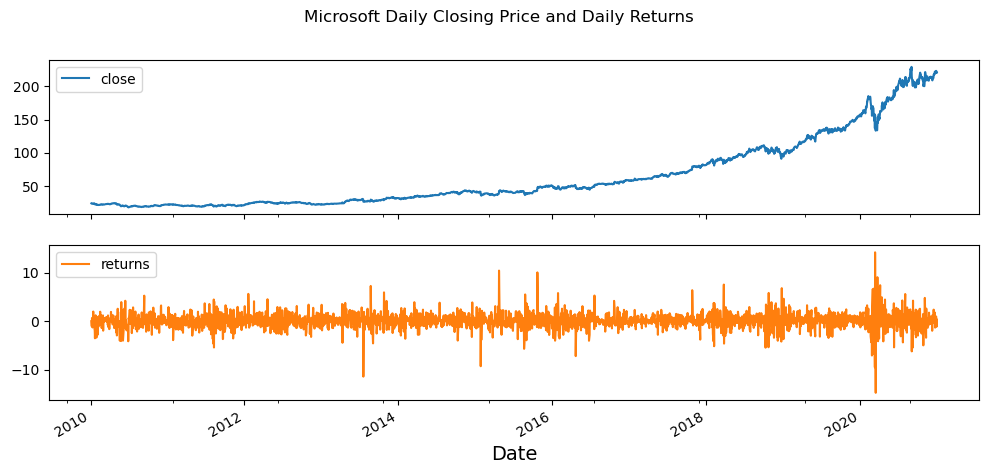

In [111]:
msft.plot(subplots=True, 
          title='Microsoft Daily Closing Price and Daily Returns');

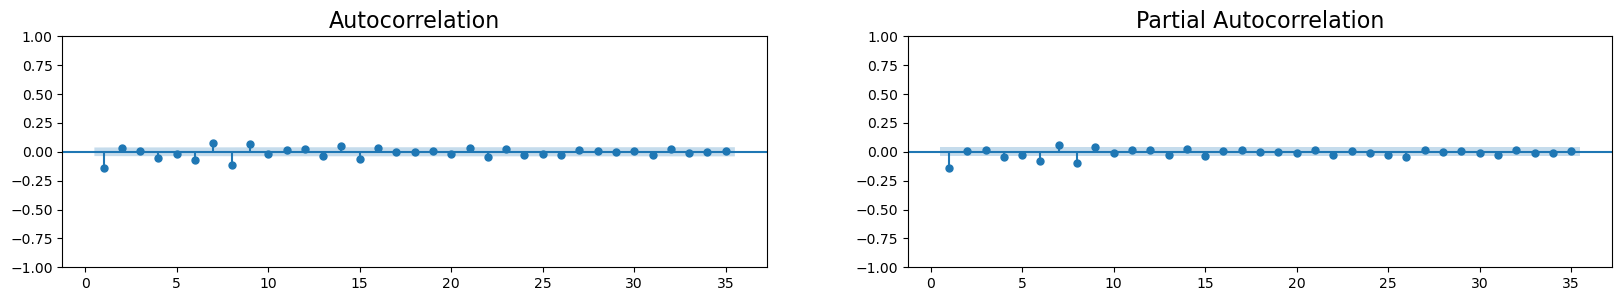

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))      # Create 1 row, 2 column subplot layout
plot_acf(msft['returns'], ax=ax[0], zero=False)    # Plot ACF on the first subplot
plot_pacf(msft['returns'], ax=ax[1], zero=False)   # Plot PACF on the second subplot
plt.show()                                         # Display the plots

In [113]:
# Return's Volatility
msft_return = msft['returns']
volatility = msft_return.std()
volatility

1.5993422487439544

In [114]:
# Converts daily volatility to annualized volatility using the square root of 252 trading days per year
annualized = np.sqrt(252)*volatility
annualized

25.38877110873185

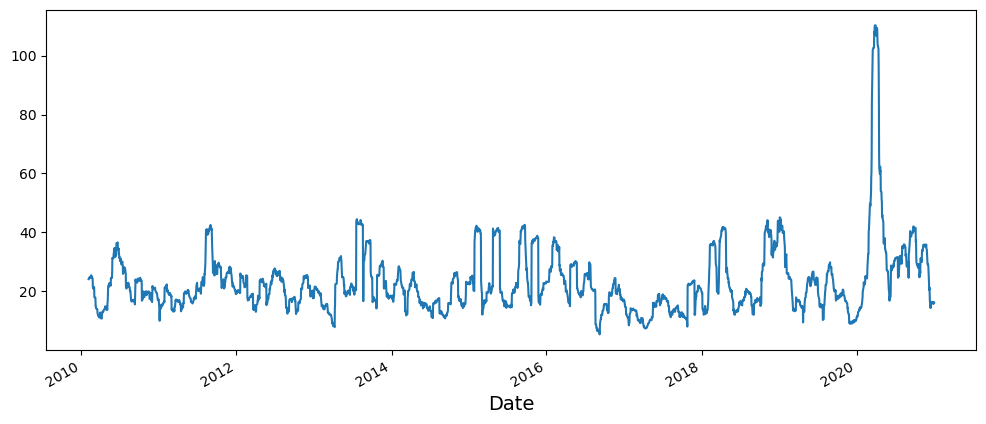

In [115]:
(
msft_return.rolling(22)                   # Creates a rolling window of 22 trading days (approx. 1 month)
.apply(lambda x: x.std() * np.sqrt(252))  # Applies a function to compute annualized volatility for each window
.plot()                                   # Plots the resulting rolling annualized volatility series
);

In [116]:
idx = round(len(msft) * 0.90)    # Calculate the index at 90% of the data length

train = msft.returns[:idx]       # Assign the first 90% of returns to the training set
test = msft.returns[idx:]        # Assign the remaining 10% of returns to the test set

print(f'Train: {train.shape}')   # Print the shape of the training set
print(f'Test: {test.shape}')     # Print the shape of the test set

Train: (2491,)
Test: (277,)


### GARCH(1,1) Model with Constant Mean

Let:
- $r_t$: return at time $t$
- $\mu$: constant mean of the returns
- $\epsilon_t$: shock at time $t$
- $\sigma_t^2$: conditional variance at time $t$

---

**Mean Equation**:
$$
r_t = \mu + \epsilon_t, \quad \epsilon_t = \sigma_t z_t, \quad z_t \sim \mathcal{N}(0,1)
$$

**Variance Equation (GARCH(1,1))**:
$$
\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2
$$

Where:
- $\omega$: constant (long-term variance level)
- $\alpha$: impact of the previous period's squared shock (**ARCH effect**)
- $\beta$: impact of the previous period's variance (**GARCH effect**)

---

✅ This model captures **volatility clustering** — periods of high and low volatility tend to cluster over time.


In [117]:
model = arch_model(train,              # Fit the ARCH/GARCH model on the training set
                   p=1, q=1,           # Specify GARCH(1,1)
                   mean='Constant',    # Include a constant mean term in the model
                   vol='GARCH',        # Use the GARCH model for volatility dynamics
                   dist='normal')      # Assume normally distributed errors

In [118]:
# Fits the GARCH(1,1) model and prints convergence progress every 5 iterations
results = model.fit(update_freq=5)

Iteration:      5,   Func. Count:     36,   Neg. LLF: 4374.845453710037
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4361.891627557763
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4361.891627557763
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11


In [119]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4361.89
Distribution:                  Normal   AIC:                           8731.78
Method:            Maximum Likelihood   BIC:                           8755.07
                                        No. Observations:                 2491
Date:                Fri, Mar 21 2025   Df Residuals:                     2490
Time:                        15:21:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1156  2.702e-02      4.279  1.877e-05 [6.266e-02,  0.169]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3594      0.127      2.836  4.574e-03   [  0.111,  0.608]
alpha[1]       0.1458  4.424e-02      3.294  9.861e-04 [5.904e-02,  0.232]
beta[1]        0.6912  8.177e-02      8.454  2.821e-17   [  0.531,  0.852]
==========================================================================

Covariance estimator: robust
"""

$\omega$, $\alpha$ and $\beta$ are estimated by Maximum Likelihood Method

In [120]:
results.params

mu          0.115615
omega       0.359401
alpha[1]    0.145750
beta[1]     0.691248
Name: params, dtype: float64

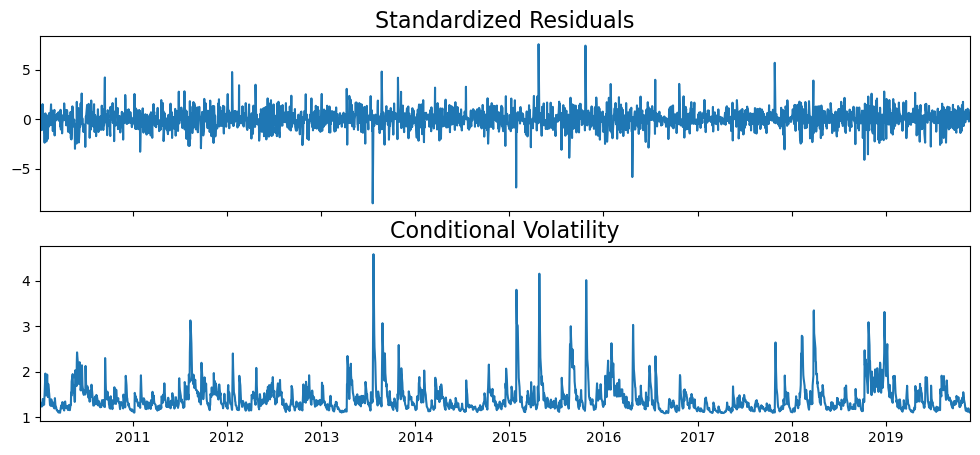

In [121]:
results.plot()
plt.show()

In [122]:
results.std_err

mu          0.027019
omega       0.126747
alpha[1]    0.044241
beta[1]     0.081768
Name: std_err, dtype: float64

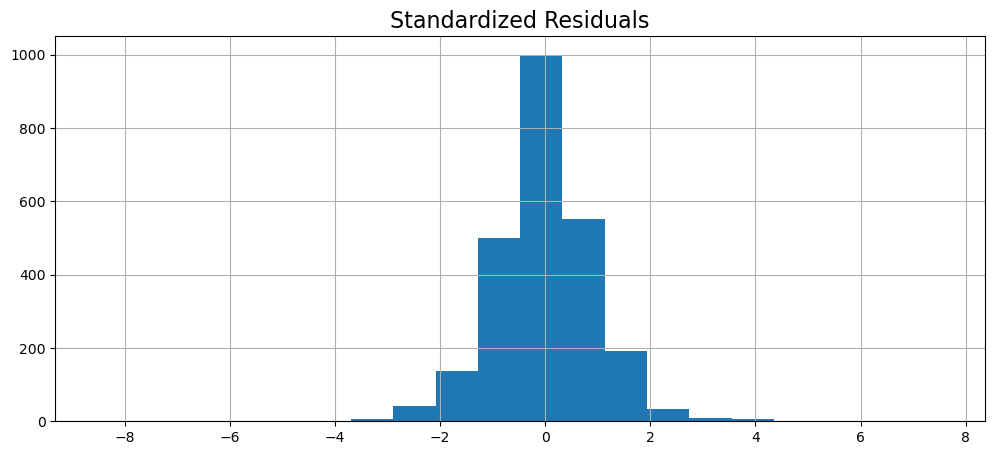

In [123]:
results.std_resid.hist(bins=20)
plt.title('Standardized Residuals');

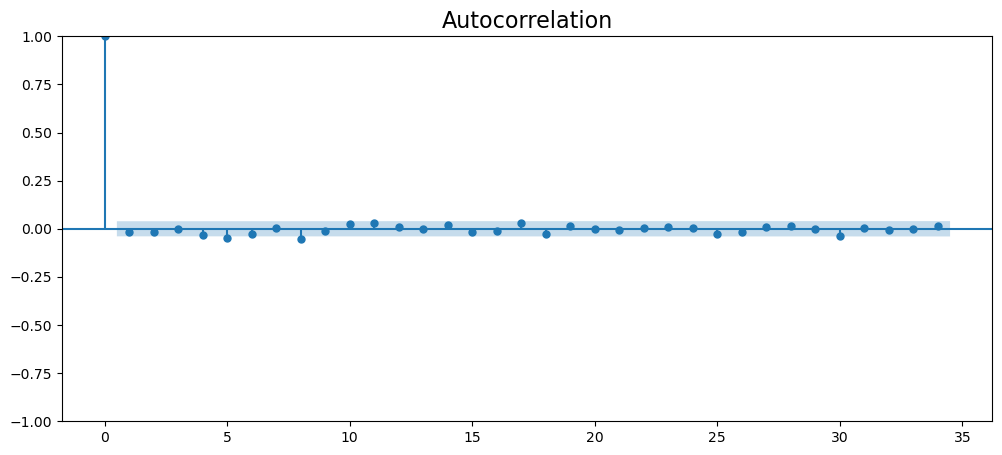

In [124]:
plot_acf(results.std_resid)
plt.show()

In [125]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(results.std_resid,             # Pass standardized residuals from the fitted GARCH model
               lags=10,                       # Test up to 10 lags for autocorrelation
               return_df=True)['lb_pvalue']   # Return p-values from the Ljung-Box test in a DataFrame and extract only the 'lb_pvalue' column

1     0.396521
2     0.530357
3     0.735656
4     0.473760
5     0.087968
6     0.070935
7     0.109796
8     0.017272
9     0.025041
10    0.021833
Name: lb_pvalue, dtype: float64

In [126]:
# Generates out-of-sample forecasts for the conditional variance over the same number of periods as the test set
msft_forecast = results.forecast(horizon=test.shape[0])  

In [127]:
# Retrieves the last row of the forecasted conditional variances
msft_forecast.variance[-1:]  

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,1.341888,1.482559,1.600301,1.69885,1.781336,1.850377,1.908163,1.956531,1.997014,2.030899,...,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893,2.204893


In [128]:
# Retrieves the last row of the forecasted conditional means
msft_forecast.mean[-1:]  

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,...,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615,0.115615


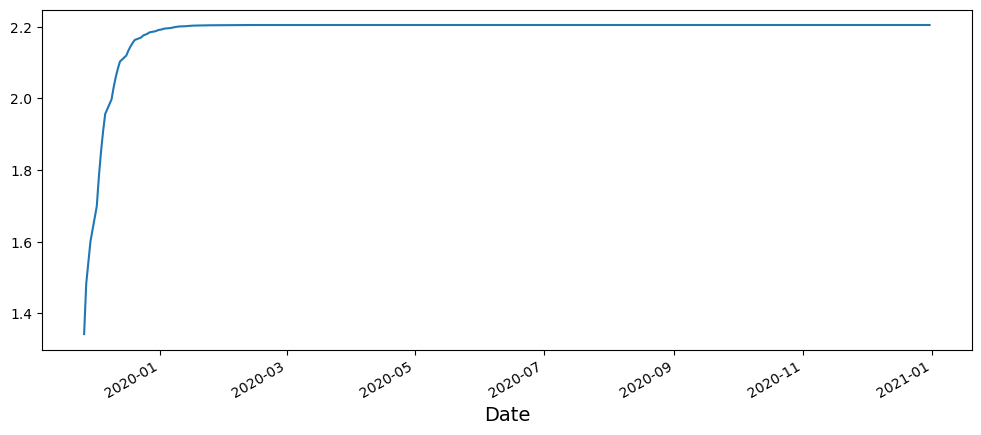

In [129]:
forecast = msft_forecast.variance[-1:]  # Extracts the last row of forecasted conditional variances

pd.Series(forecast.values.ravel(),      # Flattens the values to a 1D array and wraps in a Series
          index=test.index).plot();     # Plots the variance forecast over the test period using the test index for alignment

## There is more

In [130]:
model = arch_model(train,            # Use the training return series to fit the model
                   p=1, q=1,         # Specify a GARCH(1,1) model: 1 ARCH term (shock), 1 GARCH term (lagged variance)
                   mean='Zero',      # Assume the mean return is zero (no constant in the mean equation)
                   vol='GARCH',      # Use GARCH for modeling volatility
                   dist='normal')    # Assume normally distributed errors

results = model.fit(disp=False)      # Fit the model silently (no output during optimization)

In [131]:
results.params

omega       0.345501
alpha[1]    0.130555
beta[1]     0.711339
Name: params, dtype: float64

In [132]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4371.30
Distribution:                  Normal   AIC:                           8748.59
Method:            Maximum Likelihood   BIC:                           8766.06
                                        No. Observations:                 2491
Date:                Fri, Mar 21 2025   Df Residuals:                     2491
Time:                        15:21:25   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3455      0.127      2.717  6.594e-03 [9.624e-02,  0.595]
alpha[1]       0.1306  3.998e-02      3.266  1.091e-03 [5.220e-02,  0.209]
beta[1]        0.7113  8.038e-02      8.850  8.787e-19   [  0.554,  0.869]
==========================================================================

Covariance estimator: robust
"""

In [133]:
# Forecast conditional mean and variance for the same number of steps as in the test set
msft_forecast = results.forecast(horizon=test.shape[0])  

# Retrieve the final row of forecasted conditional means (expected returns) for the last step in the horizon
msft_forecast.mean[-1:]                                  

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.268,h.269,h.270,h.271,h.272,h.273,h.274,h.275,h.276,h.277
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
model = arch_model(train,          # Use the training return series to fit the model
                   p=1, q=1,       # Specify GARCH(1,1): 1 lag of squared residuals (ARCH), 1 lag of past variance (GARCH)
                   mean='LS',      # Include an AR(1)-style mean model estimated via least squares
                   lags=1,         # Use 1 lag in the mean equation (AR(1))
                   vol='GARCH',    # Use the GARCH model for volatility dynamics
                   dist='normal')  # Assume normal distribution for the errors

results = model.fit(disp=False)    # Fit the model without printing output during optimization

results.params                     # Display the estimated model parameters (mean and volatility parts)

Const       0.115615
omega       0.359401
alpha[1]    0.145750
beta[1]     0.691248
Name: params, dtype: float64

In [135]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Least Squares - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Least Squares   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4361.89
Distribution:                  Normal   AIC:                           8731.78
Method:            Maximum Likelihood   BIC:                           8755.07
                                        No. Observations:                 2491
Date:                Fri, Mar 21 2025   Df Residuals:                     2490
Time:                        15:21:25   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.1156  2.702e-02      4.279  1.877e-05 [6.266e-02,  0.169]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3594      0.127      2.836  4.574e-03   [  0.111,  0.608]
alpha[1]       0.1458  4.424e-02      3.294  9.861e-04 [5.904e-02,  0.232]
beta[1]        0.6912  8.177e-02      8.454  2.821e-17   [  0.531,  0.852]
==========================================================================

Covariance estimator: robust
"""

In [136]:
results.model

Least Squares(constant: yes, lags: none, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x1aa82709820